# Lendingclub data

- This dataset was downloaded from https://www.kaggle.com/wendykan/lending-club-loan-data

- This data set contains information on loans lend through the lending club platform from 2008 until 2015. For the purpose of this analysis, loans that have already been paid off will be compared to loans that have default of charged off (This means that these loans have gone >120 days without making a payment). The primary purose of this analysis is to determine what are the main differences in characteristics between borrowers that repay their loans vs borrowers that do not repay. For several of the columns, there is missing data which we will deal with by imputing zeros. This might not be the best way to handle this missing data; we could alternatively impute using the median or average of each column. When looking at the SQL calls, it should be kept in mind that the affected columns may have artificially low means due to imputing zero for null values. In addition, columns with less than 10% of the data filled in will be dropped.

##### Resourse for FDR - https://en.wikipedia.org/wiki/False_discovery_rate#Benjamini.E2.80.93Hochberg_procedure

### Description of the initial columns


**addr_state**	The state provided by the borrower in the loan application

**annual_inc**	The self-reported annual income provided by the borrower during registration.

**annual_inc_joint**	The combined self-reported annual income provided by the co-borrowers during registration

**application_type**	Indicates whether the loan is an individual application or a joint application with two co-borrowers

**collection_recovery_fee**	post charge off collection fee

**collections_12_mths_ex_med**	Number of collections in 12 months excluding medical collections

**delinq_2yrs**	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

**desc**	Loan description provided by the borrower

**dti**	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**dti_joint**	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

**earliest_cr_line**	The month the borrower's earliest reported credit line was opened

**emp_length**	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

**emp_title**	The job title supplied by the Borrower when applying for the loan.*

**fico_range_high**	The upper boundary range the borrower’s FICO at loan origination belongs to.

**fico_range_low**	The lower boundary range the borrower’s FICO at loan origination belongs to.

**funded_amnt	**The total amount committed to that loan at that point in time.

**funded_amnt_inv**	The total amount committed by investors for that loan at that point in time.

**grade**	LC assigned loan grade

**home_ownership**	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

**id**	A unique LC assigned ID for the loan listing.

**initial_list_status**	The initial listing status of the loan. Possible values are – W, F

**inq_last_6mths**	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

**installment**	The monthly payment owed by the borrower if the loan originates.

**int_rate**	Interest Rate on the loan

**is_inc_v**	Indicates if income was verified by LC, not verified, or if the income source was verified

**issue_d**	The month which the loan was funded

**last_credit_pull_d**	The most recent month LC pulled credit for this loan

**last_fico_range_high**	The upper boundary range the borrower’s last FICO pulled belongs to.

**last_fico_range_low**	The lower boundary range the borrower’s last FICO pulled belongs to.

**last_pymnt_amnt**	Last total payment amount received

**last_pymnt_d**	Last month payment was received

**loan_amnt**	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**loan_status**	Current status of the loan

**member_id**	A unique LC assigned Id for the borrower member.

**mths_since_last_delinq**	The number of months since the borrower's last delinquency.

**mths_since_last_major_derog**	Months since most recent 90-day or worse rating

**mths_since_last_record**	The number of months since the last public record.

**next_pymnt_d**	Next scheduled payment date

**open_acc**	The number of open credit lines in the borrower's credit file.

**out_prncp**	Remaining outstanding principal for total amount funded

**out_prncp_inv**	Remaining outstanding principal for portion of total amount funded by investors

**policy_code**	"publicly available policy_code=1
new products not publicly available policy_code=2"

**pub_rec**	Number of derogatory public records

**purpose**	A category provided by the borrower for the loan request. 

**pymnt_plan**	Indicates if a payment plan has been put in place for the loan

**recoveries**	post charge off gross recovery

**revol_bal**	Total credit revolving balance

**revol_util**	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**sub_grade**	LC assigned loan subgrade

**term**	The number of payments on the loan. Values are in months and can be either 36 or 60.

**title**	The loan title provided by the borrower

**total_acc**	The total number of credit lines currently in the borrower's credit file

**total_pymnt**	Payments received to date for total amount funded

**total_pymnt_inv**	Payments received to date for portion of total amount funded by investors

**total_rec_int**	Interest received to date

**total_rec_late_fee**	Late fees received to date

**total_rec_prncp**	Principal received to date

**url**	URL for the LC page with listing data.

**verified_status_joint**	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified

**zip_code**	The first 3 numbers of the zip code provided by the borrower in the loan application.

**open_acc_6m**	Number of open trades in last 6 months

**open_il_6m**	Number of currently active installment trades

**open_il_12m**	Number of installment accounts opened in past 12 months

**open_il_24m**	Number of installment accounts opened in past 24 months

**mths_since_rcnt_il**	Months since most recent installment accounts opened

**total_bal_il**	Total current balance of all installment accounts

**il_util**	Ratio of total current balance to high credit/credit limit on all install acct
	
**open_rv_12m**	Number of revolving trades opened in past 12 months

**open_rv_24m**	Number of revolving trades opened in past 24 months

**max_bal_bc**	Maximum current balance owed on all revolving accounts

**all_util**	Balance to credit limit on all trades

**total_rev_hi_lim**  	Total revolving high credit/credit limit

**inq_fi**	Number of personal finance inquiries

**total_cu_tl**	Number of finance trades

**inq_last_12m**	Number of credit inquiries in past 12 months

**acc_now_delinq**	The number of accounts on which the borrower is now delinquent.

**tot_coll_amt**	Total collection amounts ever owed

**tot_cur_bal**	Total current balance of all accounts
	
	* Employer Title replaces Employer Name for all loans listed after 9/23/2013


In [1]:
import pandas as pd
import seaborn as sns
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smf
%pylab inline
from math import sqrt
from scipy.stats import t
from scipy import stats
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.regressionplots import plot_leverage_resid2

from statsmodels.graphics.api import qqplot

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)


Populating the interactive namespace from numpy and matplotlib


In [2]:
loan_data = pd.read_csv('loan-stats.csv')

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data_df = pd.DataFrame(loan_data)

In [4]:
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

# This analysis will focus only on the loans that are fully paid vs loans that have defaulted or charged off (this means a loan has gone >120 days without a payment).

In [5]:
loan_data_df.loan_status[loan_data_df.loan_status=='Fully Paid'].count()

207723

In [6]:
loan_data_df.loan_status[loan_data_df.loan_status=='Default'].count()

1219

In [7]:
loan_data_df.loan_status[loan_data_df.loan_status=='Charged Off'].count()

45248

- 207,723 loans that were fully paid off
- 45,248 loans that were charged off
- 1,219 loans that were defaulted on

I am going to create a new df with loans that are fully paid, defaulted, or charged off.

In [8]:
#df = df.drop(df[<some boolean condition>].index)
#loan_data_dropped_df = loan_data_df.copy()

fully_paid = loan_data_df[loan_data_df.loan_status=='Fully Paid']
default = loan_data_df[loan_data_df.loan_status=='Default']
charged_off = loan_data_df[loan_data_df.loan_status=='Charged Off']
#loan_data_dropped_df = loan_data_df[fully_paid & default & charged_off]

loan_data_dropped_df = pd.concat((fully_paid,default,charged_off))
loan_data_dropped_df.describe()


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.541900e+05,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,...,144.000000,126.000000,144.000000,144.000000,144.000000,144.000000,1.904640e+05,144.000000,144.000000,144.000000
mean,1.234067e+07,1.366169e+07,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,...,36462.312500,73.657937,1.673611,3.555556,5517.340278,58.945139,2.969485e+04,1.256944,2.097222,2.625000
std,1.479726e+07,1.576494e+07,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,...,38137.563875,23.074812,1.629406,2.932284,4507.604776,20.356957,2.949980e+04,1.792551,3.903234,4.057067
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000
25%,1.462514e+06,1.709671e+06,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.321818e+06,7.660992e+06,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.655208e+07,1.858534e+07,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,...,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000


In [9]:
loan_data_dropped_df.loan_status.unique()

array(['Fully Paid', 'Default', 'Charged Off'], dtype=object)

In [10]:
#Verify the number of loans we have
print(loan_data_dropped_df.loan_status.count(), \
      (loan_data_df.loan_status[loan_data_df.loan_status=='Charged Off'].count() \
       +loan_data_df.loan_status[loan_data_df.loan_status=='Default'].count() \
       +loan_data_df.loan_status[loan_data_df.loan_status=='Fully Paid'].count()))

254190 254190


## Next let's address out null values

In [11]:
##which columns have null data
loan_data_dropped_df=loan_data_dropped_df.fillna(0)
pd.isnull(loan_data_dropped_df).any()

id                             False
member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
grade                          False
sub_grade                      False
emp_title                      False
emp_length                     False
home_ownership                 False
annual_inc                     False
verification_status            False
issue_d                        False
loan_status                    False
pymnt_plan                     False
url                            False
desc                           False
purpose                        False
title                          False
zip_code                       False
addr_state                     False
dti                            False
delinq_2yrs                    False
earliest_cr_line               False
i

In [12]:
loan_data_dropped_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.541900e+05,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,...,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,254190.000000
mean,1.234067e+07,1.366169e+07,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,...,20.656096,0.036512,0.000948,0.002014,3.125603,0.033393,2.225029e+04,0.000712,0.001188,0.001487
std,1.479726e+07,1.576494e+07,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,...,1253.392891,1.717524,0.055493,0.109521,169.310259,1.483363,2.859565e+04,0.051983,0.105172,0.114722
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,1.462514e+06,1.709671e+06,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,6.321818e+06,7.660992e+06,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+04,0.000000,0.000000,0.000000
75%,1.655208e+07,1.858534e+07,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.070000e+04,0.000000,0.000000,0.000000
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,...,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000


# Next, drop the columns where the majority of values are =0. This means that less than 5% of the column contains data. Also, drop member id and id fields since these are not attributes of each loan.

- This will be annual_inc_joint
- dti_joint
- open_acc_6m 
- open_il_6m
- open_il_12m
- open_il_24m
- mths_since_rcnt_il
- total_bal_il
- il_util
- open_rv_12m
- open_rv_24m
- max_bal_bc
- all_util
- inq_fi
- total_cu_tl
- inq_last_12m 
- index
- 'id'
- 'member_id'

In [13]:
loan_data_removecol_df = loan_data_dropped_df.drop(['il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',\
                                                 'inq_fi','total_cu_tl','inq_last_12m','open_il_6m', \
                                                 'open_il_12m','open_il_24m','mths_since_rcnt_il','annual_inc_joint',\
                                                   'dti_joint','open_acc_6m','total_bal_il','id','member_id'] , axis=1)

In [14]:
loan_data_removecol_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,...,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,254190.0,254190.000000,2.541900e+05,2.541900e+05,2.541900e+05
mean,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,0.852508,15.599426,...,158.570958,16.672949,6432.984950,0.006771,8.173425,1.0,0.003124,1.523941e+02,1.035233e+05,2.225029e+04
std,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,1.067088,22.719318,...,746.379766,113.796460,7357.852563,0.089263,19.389902,0.0,0.060602,1.820895e+04,1.448185e+05,2.859565e+04
min,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,0.000000,0.000000,...,0.000000,0.000000,484.940000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,1.000000,0.000000,...,0.000000,0.000000,3897.990000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.819450e+04,1.600000e+04
75%,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,1.000000,28.000000,...,0.000000,0.000000,10006.517500,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.648628e+05,3.070000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,8.000000,152.000000,...,33520.270000,7002.190000,36475.590000,6.000000,159.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06


## Import this DF into a sqlite database.



In [15]:
#Just to make sure we have correct naming for column names
new_names = []

for col in loan_data_removecol_df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

loan_data_removecol_df.columns = new_names

print(loan_data_removecol_df.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_

In [16]:
%load_ext sql

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [17]:
%sql sqlite:///lendingclub.db

'Connected: None@lendingclub.db'

In [18]:
%%sql
DROP table IF Exists lendingclub;

Done.


[]

In [19]:
engine = create_engine('sqlite:///lendingclub.db')
conn = engine.connect()
loan_data_removecol_df.to_sql('lendingclub', conn)

    Now time to write some sql queries

In [20]:


pd.read_sql('SELECT * FROM lendingclub LIMIT 5;',engine)


,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,0,...,Jan-2016,0.0,0.0,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0
1,2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,0,...,Jan-2016,0.0,0.0,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0
2,3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Jan-2015,0.0,0.0,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0
3,5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,Sep-2015,0.0,0.0,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0
4,7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,...,Dec-2014,0.0,0.0,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0


# SQl
- What is the average loan_amount and interest rate by grade for each type of loan (paid off of default/charged off)?

In [21]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, grade, loan_status, \
            AVG(mths_since_last_delinq),COUNT(grade) as num_of_loans,AVG(dti) as debt_to_income,avg(annual_inc)\
            FROM lendingclub  \
            WHERE loan_status = 'Fully Paid' \
            GROUP BY grade;",engine)

,average_loan_size,average_interest,grade,loan_status,AVG(mths_since_last_delinq),num_of_loans,debt_to_income,avg(annual_inc)
0,12259.117543,7.488409,A,Fully Paid,10.393987,39679,14.019528,80483.128232
1,12384.274036,11.514316,B,Fully Paid,15.840246,66546,15.943894,72384.464453
2,13225.645431,14.571925,C,Fully Paid,17.207468,52678,16.793426,71444.363016
3,14090.505496,17.519152,D,Fully Paid,18.119920,30020,17.306454,71377.583918
4,17594.421024,20.224206,E,Fully Paid,17.994044,12928,17.631237,77803.172045
5,19058.887008,23.342537,F,Fully Paid,17.672662,4726,17.552017,80223.064970
6,21431.173647,25.027365,G,Fully Paid,17.377836,1146,17.556152,90262.095079


In [22]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, grade, loan_status,\
        AVG(mths_since_last_delinq), COUNT(grade) as num_of_loans, AVG(dti) as debt_to_income,avg(annual_inc)\
            FROM lendingclub  \
            WHERE loan_status ='Default' \
            GROUP BY grade;",engine) 

,average_loan_size,average_interest,grade,loan_status,AVG(mths_since_last_delinq),num_of_loans,debt_to_income,avg(annual_inc)
0,14974.468085,7.722553,A,Default,16.680851,47,16.788298,101624.170213
1,13089.772727,11.340000,B,Default,13.904040,198,18.071869,68864.342121
2,13833.402778,14.272389,C,Default,15.213889,360,19.619778,62411.119972
3,16252.724359,17.318365,D,Default,18.820513,312,20.590769,65464.852564
4,16869.029851,20.167214,E,Default,18.592040,201,21.426269,67578.131592
5,17412.974684,24.041519,F,Default,15.405063,79,22.281519,64847.278481
6,18570.454545,25.974545,G,Default,18.500000,22,19.179545,61937.634545


In [23]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, grade, annual_inc, loan_status,AVG(mths_since_last_delinq),\
            COUNT(grade) as num_of_loa, AVG(dti) as debt_to_income, AVG(annual_inc)\
            FROM lendingclub  \
            WHERE loan_status ='Charged Off' \
            GROUP BY grade;",engine)

,average_loan_size,average_interest,grade,annual_inc,loan_status,AVG(mths_since_last_delinq),num_of_loa,debt_to_income,AVG(annual_inc)
0,11872.764616,7.820592,A,46500.0,Charged Off,10.312572,2617,15.870344,66779.869660
1,12520.088770,11.799493,B,50000.0,Charged Off,14.338586,9519,17.370823,63114.451657
2,13512.990429,14.867335,C,62000.0,Charged Off,15.390049,12642,18.564382,63024.875968
3,14537.819474,17.750135,D,48000.0,Charged Off,16.263303,10486,18.865661,63440.755335
4,17761.229626,20.591512,E,32000.0,Charged Off,16.569191,6258,19.508717,69144.608423
5,19471.088957,23.556125,F,98000.0,Charged Off,16.196660,2934,19.128701,71598.601149
6,21263.446970,25.054520,G,75000.0,Charged Off,15.377525,792,19.057702,81622.731351


# What about grouped by loan_status?

In [24]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, loan_status,AVG(mths_since_last_delinq),\
            COUNT(grade) as num_of_loans, AVG(dti) as debt_to_income, AVG(annual_inc)\
            FROM lendingclub   \
            GROUP BY loan_status;",engine)

,average_loan_size,average_interest,loan_status,AVG(mths_since_last_delinq),num_of_loans,debt_to_income,AVG(annual_inc)
0,14556.293096,16.015850,Charged Off,15.292720,45248,18.403126,65085.132717
1,15193.847416,16.139459,Default,16.609516,1219,19.970131,66754.126612
2,13346.350910,13.274244,Fully Paid,15.660307,207723,16.139156,74161.752983


# Let's group these loans into the Default / Charged off and Paid groups

In [25]:
loan_remove_col_default_chargedoff_df = pd.read_sql("SELECT *\
            FROM lendingclub   \
            WHERE loan_status = 'Charged Off' or loan_status='Default';",engine)


In [26]:
loan_remove_col_default_chargedoff_df.loan_status.unique()

array(['Default', 'Charged Off'], dtype=object)

In [27]:
loan_removecol_paid_df =  pd.read_sql("SELECT *\
            FROM lendingclub   \
            WHERE loan_status = 'Fully Paid';",engine)



In [28]:
loan_removecol_paid_df.loan_status.unique()

array(['Fully Paid'], dtype=object)

In [29]:
loan_removecol_total_df = pd.read_sql("SELECT * FROM lendingclub WHERE loan_status ='Fully Paid' \
OR loan_status ='Default' OR loan_status ='Charged Off'; ",engine)

# Back to Python

### For the next part of this analysis, we will primarily look at either loans that have defaulted or charged off vs loans that have been paid off.

In [30]:
loan_remove_col_default_chargedoff_df.describe()

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,...,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.0,46467.000000,46467.000000,4.646700e+04,4.646700e+04
mean,245932.817311,14573.018486,14528.669271,14411.372330,16.019092,441.073219,6.512892e+04,18.444234,0.278757,0.980309,...,867.436067,91.206597,454.998240,0.008285,8.341985,1.0,0.003938,104.953042,8.964967e+04,2.070076e+04
std,201756.826196,8391.928489,8366.116179,8390.706853,4.301283,246.793319,5.686452e+04,7.950591,0.799408,1.127832,...,1559.671060,253.065131,650.022043,0.096177,19.478848,0.0,0.070703,1152.924656,1.225158e+05,2.499265e+04
min,1.000000,900.000000,900.000000,0.000000,5.420000,21.620000,4.080000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,104944.500000,8000.000000,8000.000000,8000.000000,13.050000,265.810000,4.000000e+04,12.610000,0.000000,0.000000,...,0.000000,0.000000,237.850000,0.000000,0.000000,1.0,0.000000,0.000000,8.008500e+03,5.100000e+03
50%,196021.000000,12700.000000,12600.000000,12400.000000,15.800000,391.170000,5.600000e+04,18.380000,0.000000,1.000000,...,16.250000,0.000000,375.880000,0.000000,0.000000,1.0,0.000000,0.000000,3.663000e+04,1.580000e+04
75%,355724.500000,20000.000000,20000.000000,19975.000000,18.920000,573.320000,7.800000e+04,24.140000,0.000000,2.000000,...,1214.165000,24.915500,568.700000,0.000000,0.000000,1.0,0.000000,0.000000,1.378180e+05,2.890000e+04
max,887371.000000,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,39.980000,18.000000,8.000000,...,33520.270000,7002.190000,34833.350000,4.000000,152.000000,1.0,5.000000,95806.000000,3.437283e+06,1.998700e+06


In [31]:
loan_remove_col_default_chargedoff_df.loan_amnt.count()

# DROP the index columns
loan_remove_col_default_chargedoff_df = loan_remove_col_default_chargedoff_df.drop(['index'],axis=1)
loan_removecol_paid_df = loan_removecol_paid_df.drop(['index'],axis=1)

In [32]:
list(loan_remove_col_default_chargedoff_df.columns.values)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

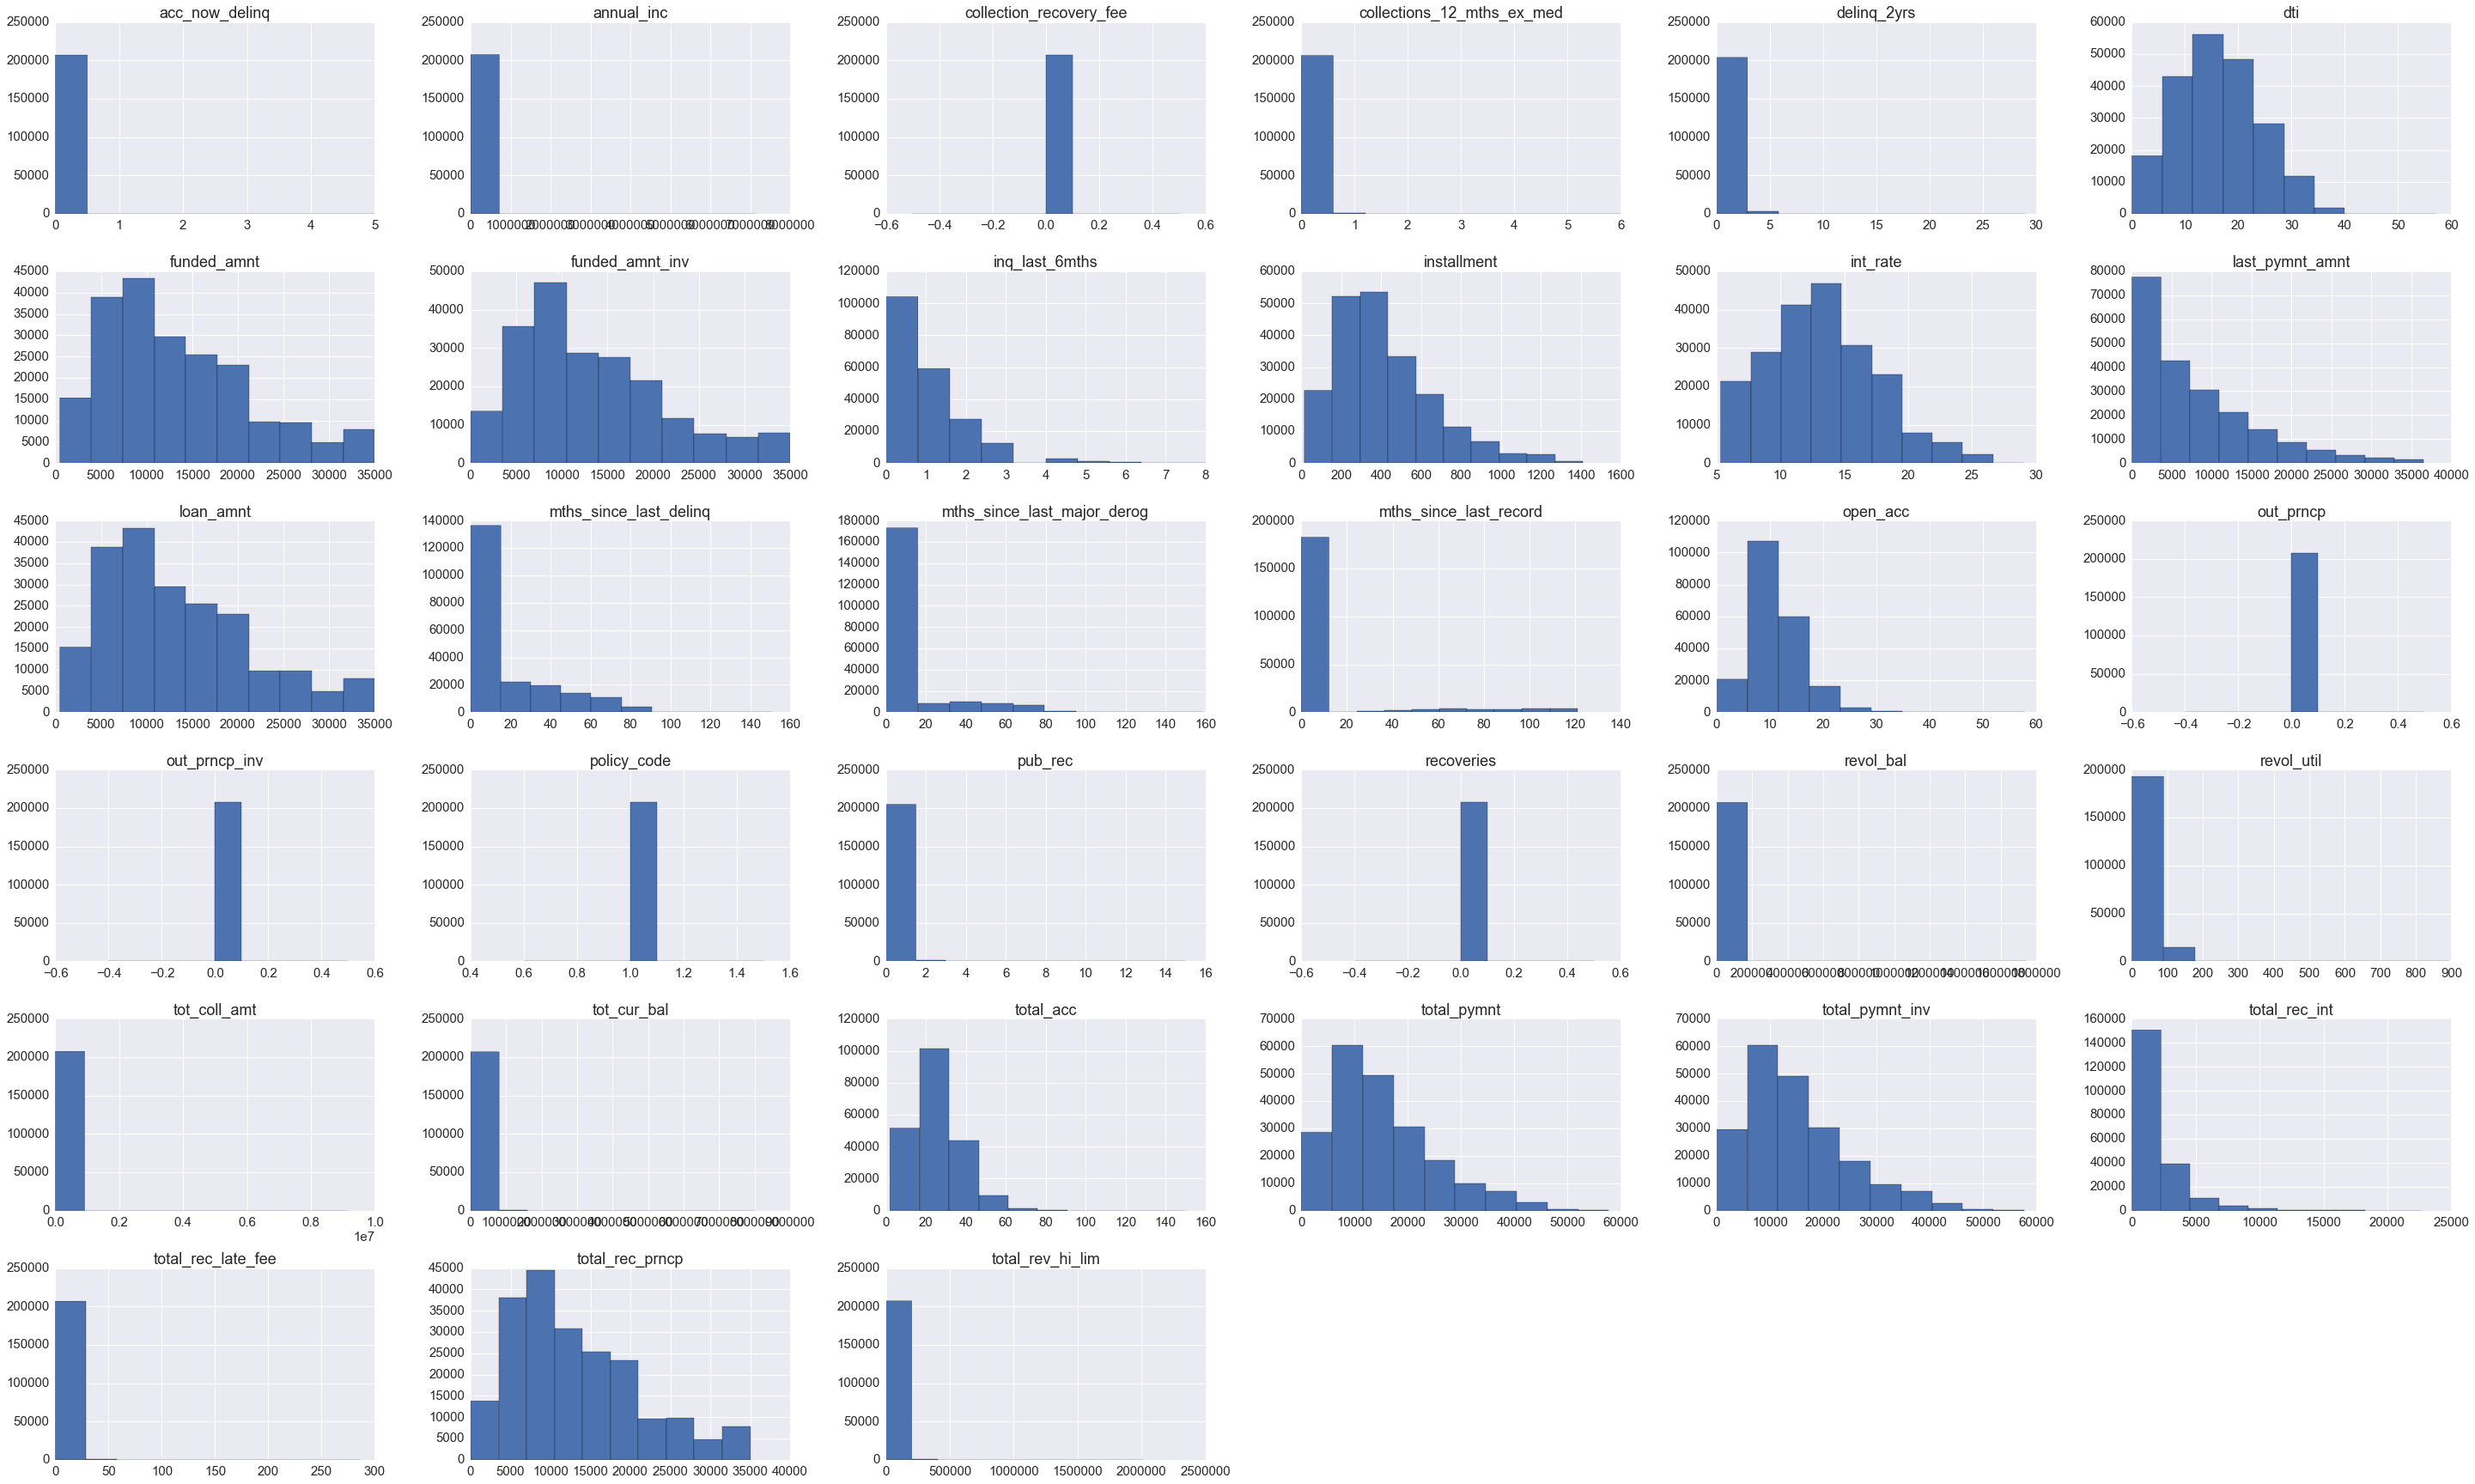

In [33]:
#Let us see what the numeric variables look like

loan_removecol_paid_df.hist(figsize=([50,30]))
plt.title('HIstogram of loans that have been paid off');

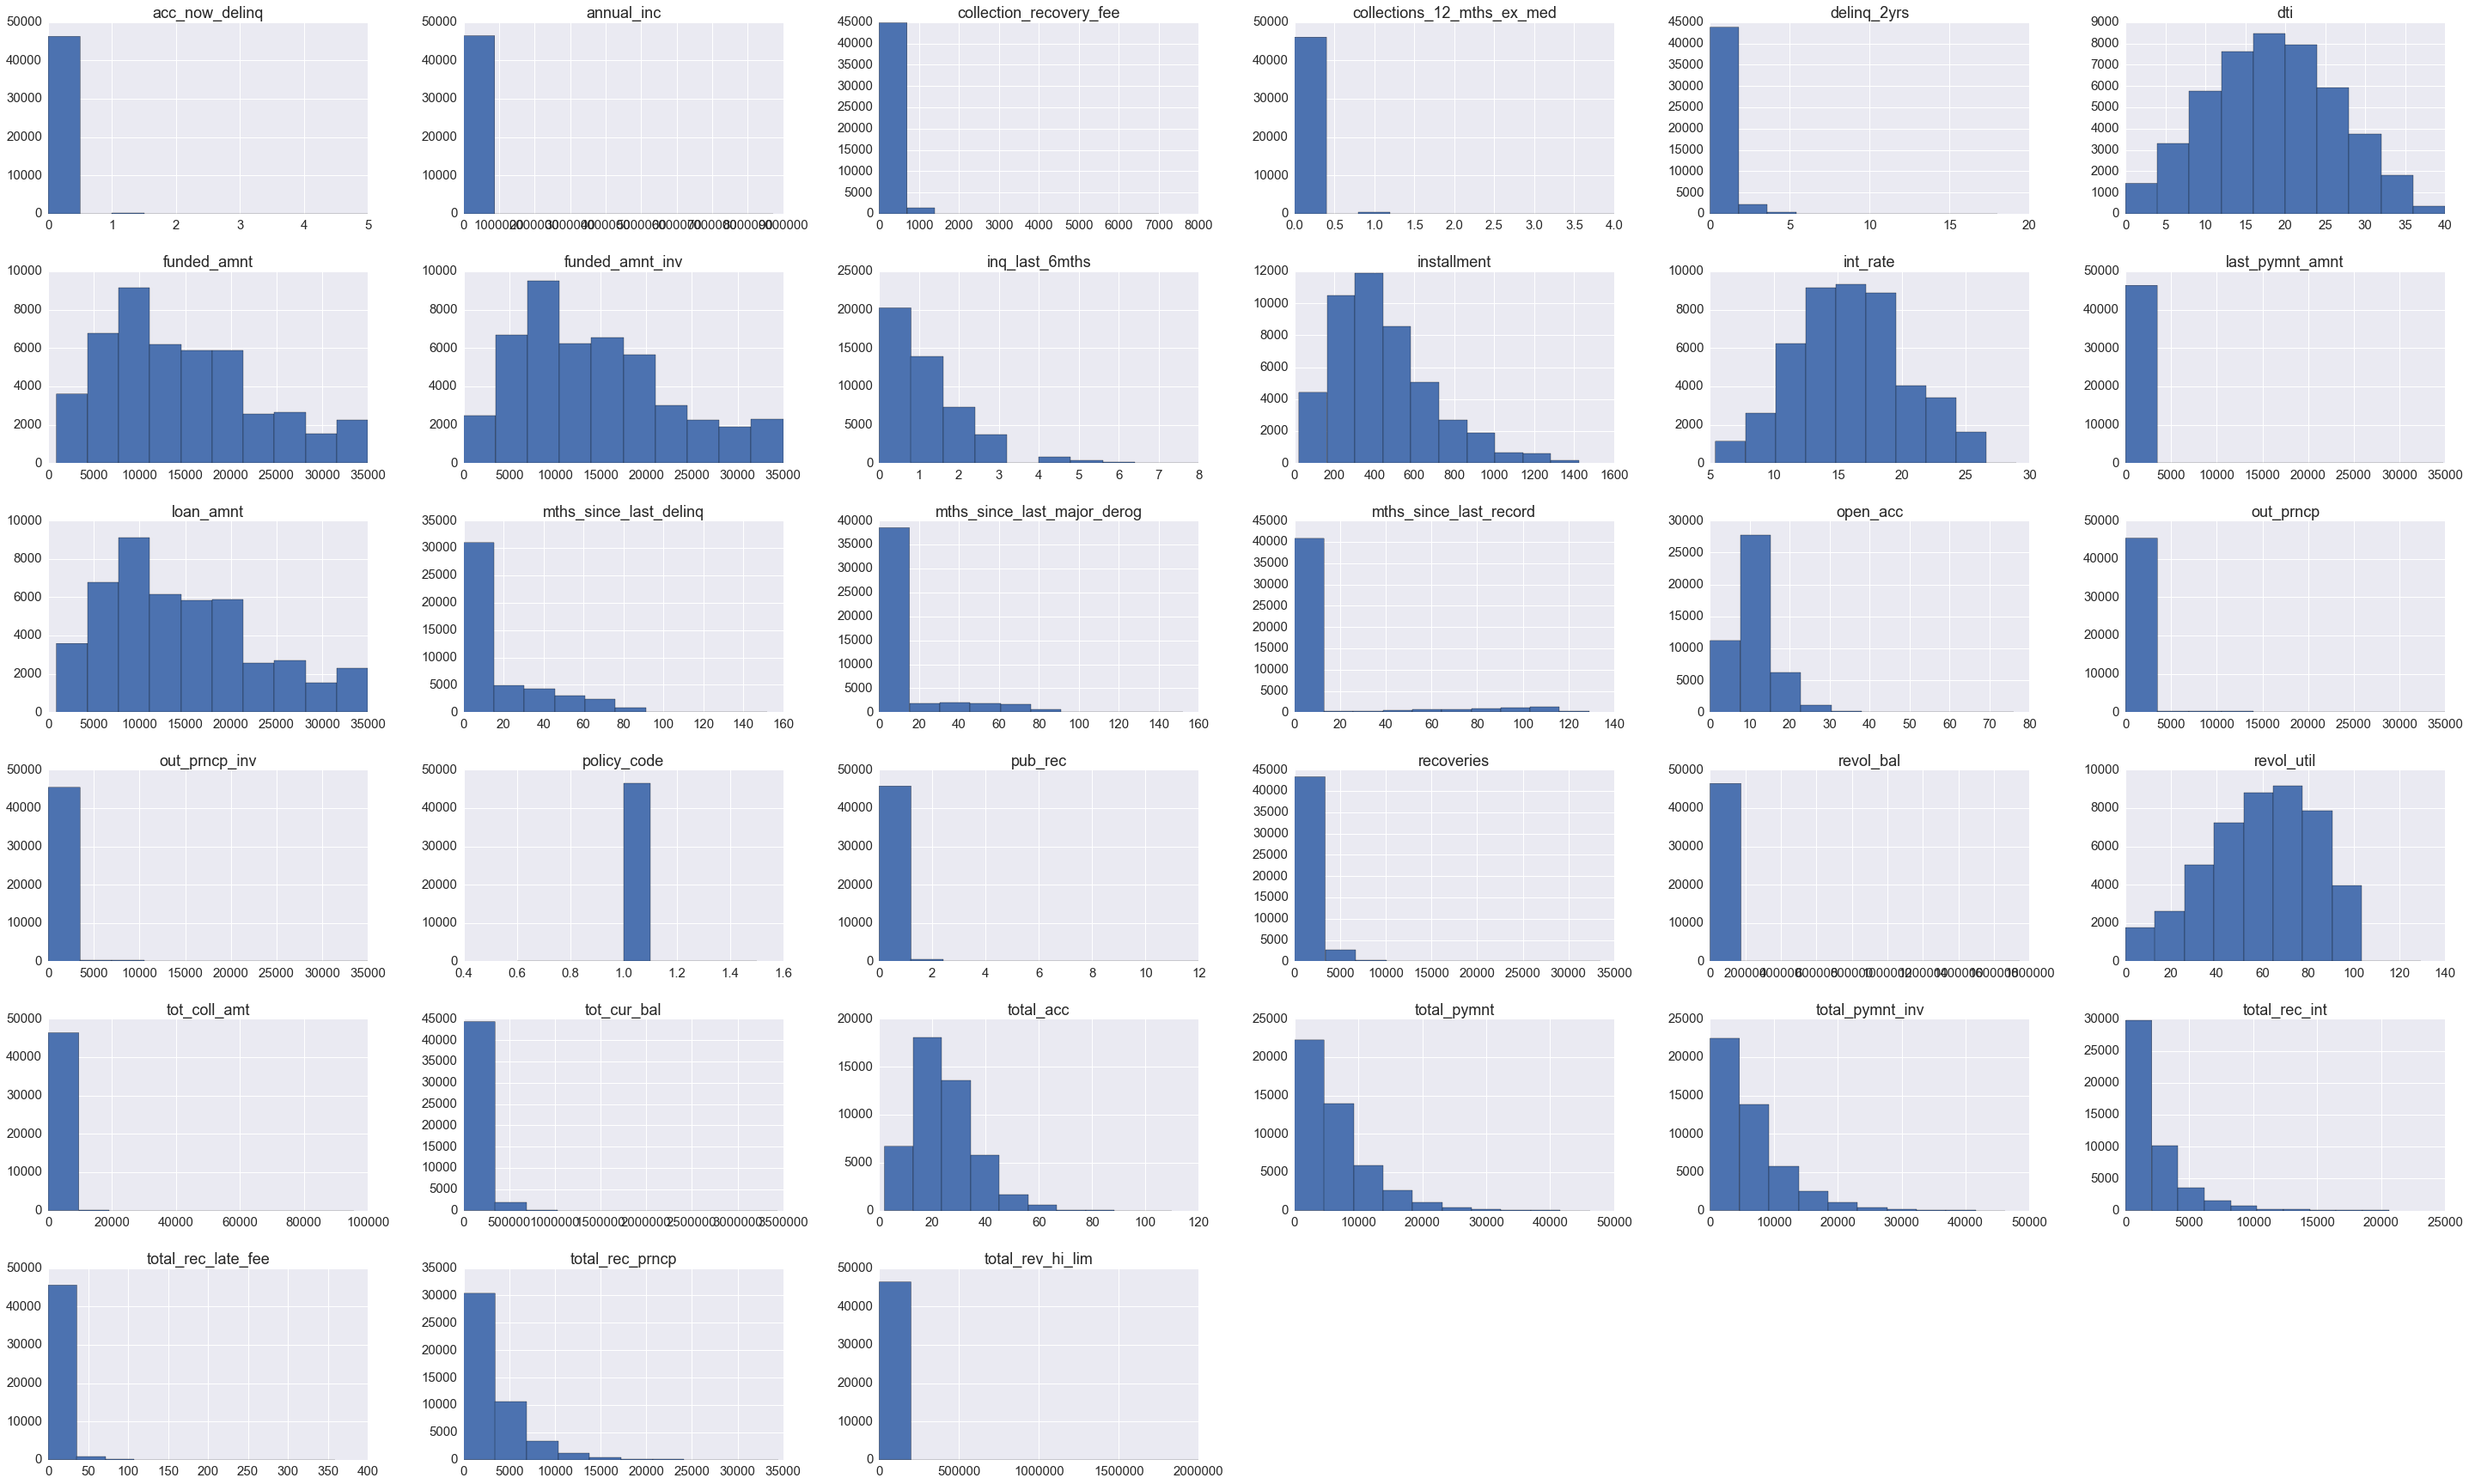

In [34]:
#Histogram of loans that have deafulted/charged off
loan_remove_col_default_chargedoff_df.hist(figsize = ([50,30]));

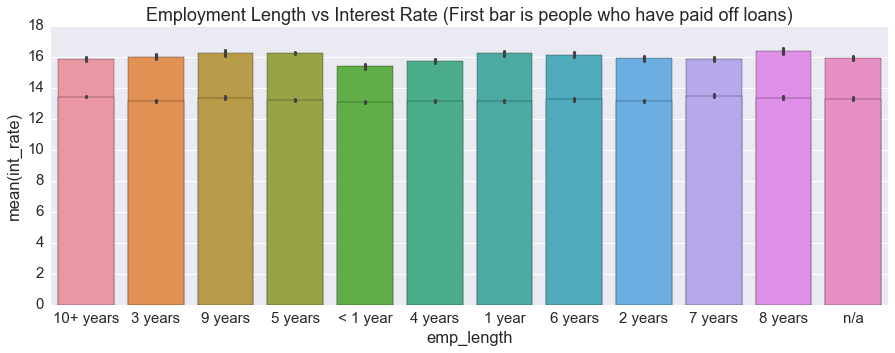

In [35]:
plt.figure(figsize=([15,5]))
plt.title('Employment Length vs Interest Rate (First bar is people who have paid off loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.emp_length,y=loan_remove_col_default_chargedoff_df.int_rate)
sns.barplot(x=loan_removecol_paid_df.emp_length,y=loan_removecol_paid_df.int_rate);

- As expected, interest rate is lower across the board for people who have paid off their loans (lower risk). 

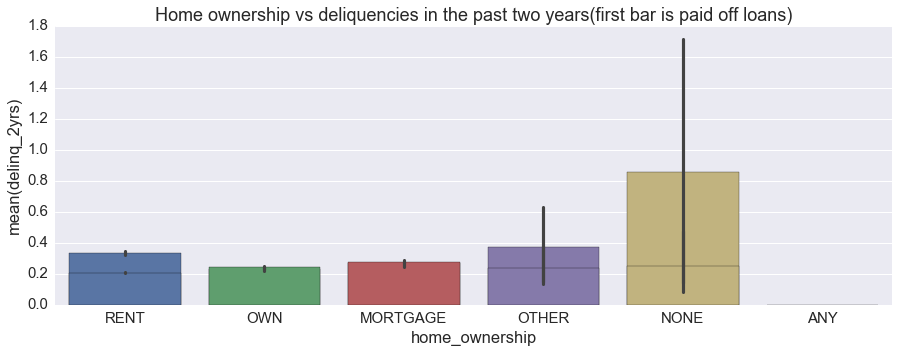

In [36]:
plt.figure(figsize=([15,5]))
plt.title('Home ownership vs deliquencies in the past two years(first bar is paid off loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.home_ownership, y=loan_remove_col_default_chargedoff_df.delinq_2yrs)
sns.barplot(x=loan_removecol_paid_df.home_ownership,y=loan_removecol_paid_df.delinq_2yrs);

- For deliquencies in the past two years, the largest difference in the none category.  Here, loans that have defaulted/charged off have a much higher rate of deliquencies that other categories. It may be effective to screen out these loans in your filtering process.

''

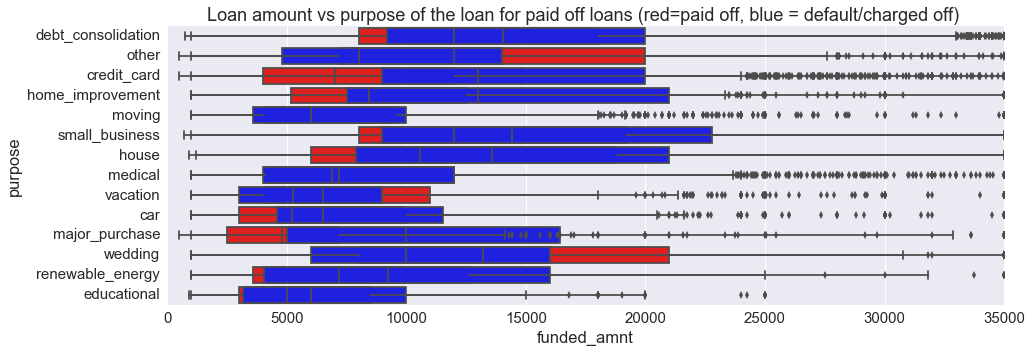

In [37]:
plt.figure(figsize=([15,5]))
plt.title('Loan amount vs purpose of the loan for paid off loans (red=paid off, blue = default/charged off) ')
sns.boxplot(x=loan_removecol_paid_df.funded_amnt,y=loan_removecol_paid_df.purpose,color='red')
sns.boxplot(x=loan_remove_col_default_chargedoff_df.funded_amnt, y=loan_remove_col_default_chargedoff_df.purpose,color='blue')
;

- Comparing these next two graphs, the biggest difference for loans that are not paid off is larger funded amounts for small business, debt consolidation, credit card, home improvement, and house, and renewable energy.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


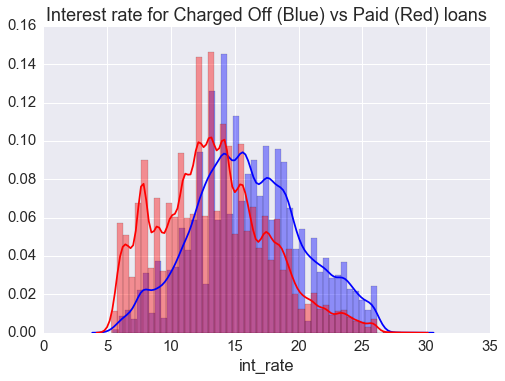

In [38]:
plt.title('Interest rate for Charged Off (Blue) vs Paid (Red) loans')
sns.distplot(loan_remove_col_default_chargedoff_df.int_rate,color='blue')
sns.distplot(loan_removecol_paid_df.int_rate,color='red');

- As epected, due to higher risk, loans that are not paid back have higher interest rate.

''

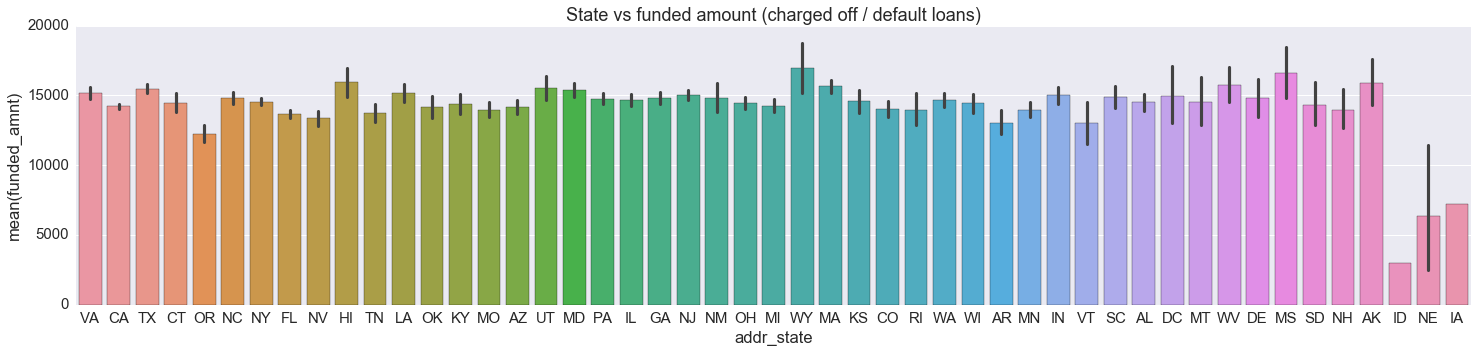

In [39]:
plt.figure(figsize=([25,5]))
plt.title('State vs funded amount (charged off / default loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.addr_state, y=loan_remove_col_default_chargedoff_df.funded_amnt)
;

# It looks like ME has a large variance in how much they fund loans for (for paid off loans). The rest of the states look fairly normal.

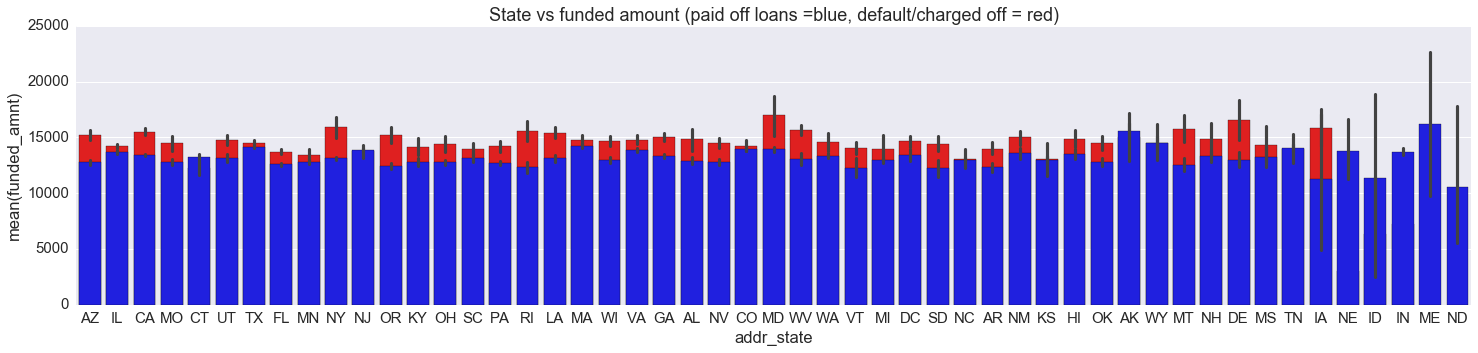

In [40]:
plt.figure(figsize=([25,5]))
plt.title('State vs funded amount (paid off loans =blue, default/charged off = red)')

sns.barplot(x=loan_remove_col_default_chargedoff_df.addr_state, y=loan_remove_col_default_chargedoff_df.funded_amnt,color='red')
sns.barplot(x=loan_removecol_paid_df.addr_state,y=loan_removecol_paid_df.funded_amnt,color='blue');

- In comparing the ammount funded per state, loans that are defaulted have on average a higher loan total value. The biggest discrepancy in funding amounts between these two types of loans are ID, DE, and OR. 

''

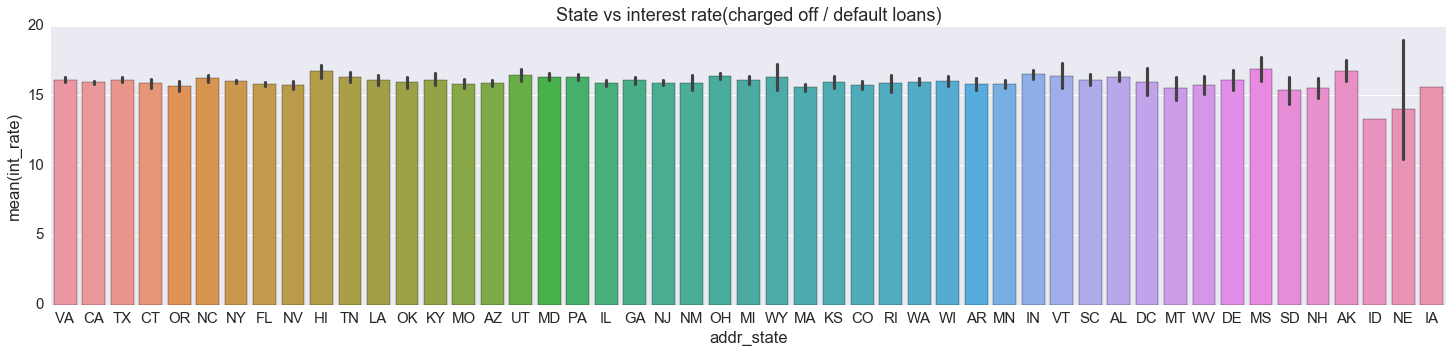

In [41]:
plt.figure(figsize=([25,5]))
plt.title('State vs interest rate(charged off / default loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.addr_state, y=loan_remove_col_default_chargedoff_df.int_rate)
;

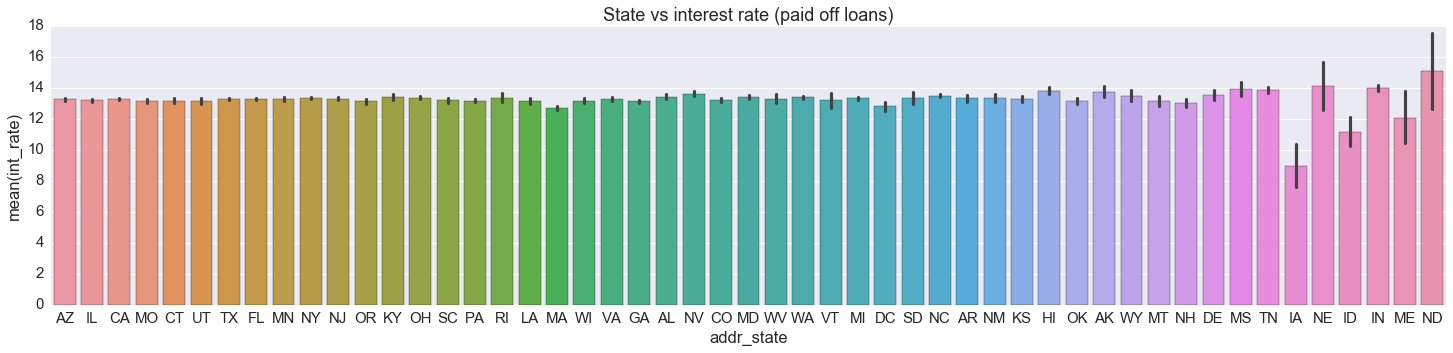

In [42]:
plt.figure(figsize=([25,5]))
plt.title('State vs interest rate (paid off loans)')
sns.barplot(x=loan_removecol_paid_df.addr_state,y=loan_removecol_paid_df.int_rate);

# Highest interest rate states seem to be ND and NE (for paid off loans) and NE, MS, AK, HI (for deafulted / charged off loans). Interest rate is a decent proxy for risk, so these states should be viewed as higher risk than other states for lending out to.

# Statistics and Probability

In [43]:
default_chargedoff_sample_df = loan_remove_col_default_chargedoff_df.sample(100)

In [44]:
paidoff_sample_df = loan_removecol_paid_df.sample(100)

- Below, we can compare the statistics between the two samples.

In [45]:
default_chargedoff_sample_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00,100.000000,100.0,100.0,100.000000,100.00000,100.000000
mean,14897.500000,14897.500000,14713.455070,16.147100,452.265700,72637.668400,18.371300,0.200000,0.950000,17.090000,...,1167.749400,154.869614,465.283500,0.01,9.550000,1.0,0.0,91.150000,87092.90000,26790.460000
std,9895.694337,9895.694337,10063.685286,4.221458,292.573216,53376.424212,7.718746,0.586033,1.131505,24.586313,...,2319.510384,477.800538,328.397587,0.10,21.948689,0.0,0.0,685.500413,131396.59846,37566.872067
min,1000.000000,1000.000000,225.000000,7.750000,31.570000,8508.000000,1.440000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,1.0,0.0,0.000000,0.00000,0.000000
25%,8000.000000,8000.000000,8000.000000,13.345000,240.977500,43341.750000,12.337500,0.000000,0.000000,0.000000,...,0.000000,0.000000,238.847500,0.00,0.000000,1.0,0.0,0.000000,8120.25000,5075.000000
50%,12000.000000,12000.000000,11700.000000,15.800000,386.440000,60000.000000,18.905000,0.000000,1.000000,0.000000,...,31.130000,1.410900,382.185000,0.00,0.000000,1.0,0.0,0.000000,32233.00000,14704.500000
75%,20000.000000,20000.000000,20000.000000,19.087500,575.285000,89935.500000,24.225000,0.000000,2.000000,34.000000,...,1235.772500,40.505675,631.365000,0.00,0.000000,1.0,0.0,0.000000,110664.25000,36325.000000
max,35000.000000,35000.000000,35000.000000,25.570000,1274.840000,415000.000000,32.460000,4.000000,5.000000,80.000000,...,14277.830000,3988.810000,1479.730000,1.00,80.000000,1.0,0.0,6813.000000,737722.00000,302700.000000


In [46]:
paidoff_sample_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,100.0,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.000000
mean,13531.25000,13531.25000,13214.550213,13.448300,426.417200,75729.120000,16.028500,0.100000,0.660000,13.380000,...,0.0,0.0,7578.305500,0.0,6.290000,1.0,0.0,26.170000,97209.320000,22713.880000
std,8384.19281,8384.19281,8415.824195,4.328731,265.880758,46715.135513,7.705473,0.389249,0.912539,22.331198,...,0.0,0.0,7998.096821,0.0,17.961966,0.0,0.0,160.833062,129794.528456,27248.119582
min,1000.00000,1000.00000,0.000000,5.420000,32.440000,17500.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,8.000000,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,7956.25000,7956.25000,7818.750000,10.645000,244.557500,44500.000000,10.082500,0.000000,0.000000,0.000000,...,0.0,0.0,912.887500,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,12000.00000,12000.00000,11662.500000,13.135000,348.770000,67000.000000,14.480000,0.000000,0.000000,0.000000,...,0.0,0.0,5319.125000,0.0,0.000000,1.0,0.0,0.000000,36557.500000,17000.000000
75%,18250.00000,18250.00000,16343.750000,16.222500,588.295000,94250.000000,20.367500,0.000000,1.000000,29.250000,...,0.0,0.0,10474.887500,0.0,0.000000,1.0,0.0,0.000000,154172.250000,28950.000000
max,35000.00000,35000.00000,35000.000000,25.830000,1273.960000,316800.000000,38.240000,3.000000,4.000000,81.000000,...,0.0,0.0,32033.810000,0.0,74.000000,1.0,0.0,1213.000000,651761.000000,139000.000000


# Compare the sample statistics and population statistics for interest rate for default/charged off vs paid off loans.

In [47]:
default_chargedoff_sample_df.int_rate.describe()

count    100.000000
mean      16.147100
std        4.221458
min        7.750000
25%       13.345000
50%       15.800000
75%       19.087500
max       25.570000
Name: int_rate, dtype: float64

In [48]:
loan_remove_col_default_chargedoff_df.int_rate.describe()

count    46467.000000
mean        16.019092
std          4.301283
min          5.420000
25%         13.050000
50%         15.800000
75%         18.920000
max         28.990000
Name: int_rate, dtype: float64

In [49]:
loan_removecol_paid_df.int_rate.describe()

count    207723.000000
mean         13.274244
std           4.268371
min           5.320000
25%          10.160000
50%          13.110000
75%          15.810000
max          28.990000
Name: int_rate, dtype: float64

In [50]:
default_chargedoff_sample_df.int_rate.describe()

count    100.000000
mean      16.147100
std        4.221458
min        7.750000
25%       13.345000
50%       15.800000
75%       19.087500
max       25.570000
Name: int_rate, dtype: float64

- The sample statistics for our default/charged off loans and paid off loans shows a smaller STD than our population (due to fewer observations samples at the ends of the distribution). In addition, the min and max interest rate are more extreme than in our sample.

## What is the probability that for deafult/charged off loans, you pick 6 loans that are all grade A?

In [51]:
loan_remove_col_default_chargedoff_df.groupby('grade').grade.count()

grade
A     2664
B     9717
C    13002
D    10798
E     6459
F     3013
G      814
Name: grade, dtype: int64

- There are 2664 grade A loans out of 46467 total loand for default or charged off loans. The probability that you pick six grade A loans (assuming each loan has an equal probability of being picked) is $2664/46467 * 2663/46466 * 2662/46465 * 2661/46464 * 2660/46463 * 2659/46462 = 3.5309411533268e-08$

In [52]:
2664/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2663/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2662/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2661/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2660/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2659/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()

3.5309411533268e-08

# What is the probability of receiving a paid off loan for each grade? (assuming we are only looking at paid off vs default/charged off loans).

In [53]:
loan_remove_col_default_chargedoff_df.groupby('grade').grade.count()

grade
A     2664
B     9717
C    13002
D    10798
E     6459
F     3013
G      814
Name: grade, dtype: int64

In [54]:
loan_removecol_paid_df.groupby('grade').grade.count()

grade
A    39679
B    66546
C    52678
D    30020
E    12928
F     4726
G     1146
Name: grade, dtype: int64

In [55]:
loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()+loan_removecol_paid_df.groupby('grade').grade.count()

grade
A     86146
B    113013
C     99145
D     76487
E     59395
F     51193
G     47613
Name: grade, dtype: int64

- For grade A, the probability of a paid off loan is 39679/86146= **46%**
- For grade B, the probability of a paid off loan is 66546/113013=**59%**
- For grade C, the probability of a paid off loan is  52678/99145=**53%**
- For grade D, the probability of a paid off loan is 30020/76487=**39**
- For grade E, the probability of a paid off loan is 12928/59395=**22%**
- For grade F, the probability of a paid off loan is 4726/51193=**9%**
- For grade G, the probability of a paid off loans is 1146/47613=**2.4%**

In [56]:
1146/47613

0.024069056770209818

# What is the probability of someone paying off a loan given that your loan amount is between 0-2k, 2k-5k,5k-10k,10k-20k,20k+ (This assumes we are only looking at paid off or default/charged off loans).

In [57]:
#loan_amnt 

In [58]:
#number of default or charged off loans with loan amount 0-2k
loan_remove_col_default_chargedoff_df[loan_remove_col_default_chargedoff_df.loan_amnt<2000].grade.count()

504

In [59]:
#loan amount 0-2k for default or charged off loans
loan_removecol_paid_df[loan_removecol_paid_df.loan_amnt<2000].grade.count()

3207

- Probability of having a loan paid off with borrowed amount between 0k-2k (not including 2k) is 3207/(3207+504) =**86.4%**

In [60]:
#number of default or charged off loans with loan amount 2-5k
loan_remove_col_default_chargedoff_df[loan_remove_col_default_chargedoff_df.loan_amnt<2000].grade.count()

504

### Now for 2-5k

In [61]:
#loan amount 2-5k for paid off loans


loan_removecol_paid_df.loc[(loan_removecol_paid_df.loan_amnt>=2000)\
                           & (loan_removecol_paid_df.loan_amnt<5000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

20169

In [62]:
#loan amount 2-5k for default / charged off loans

loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.loan_amnt>=2000)\
                           & (loan_remove_col_default_chargedoff_df.loan_amnt<5000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

3870

- The probability of having a paid off loan with funding amount bewteen 2-5k (not including 5k) is 20169/(20169+3870)=**83.9%**

In [63]:
20169/(20169+3870)

0.8390116061400225

### Now, for funding amount 5-10k.

In [64]:
#loan amount 5-10k for paid off loans


loan_removecol_paid_df.loc[(loan_removecol_paid_df.loan_amnt>=5000)\
                           & (loan_removecol_paid_df.loan_amnt<10000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

54947

In [65]:
#loan amount 5-10k for default / charged off loans

loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.loan_amnt>=5000)\
                           & (loan_remove_col_default_chargedoff_df.loan_amnt<10000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

10552

The probability of having a paid off loan for funding amount between 5-10k (not including 10k) is 54947/(54947 + 10552) =  **83.8%**

In [66]:
54947/(54947 + 10552)

0.8388983037908976

### Now, for  funding 10k-20k

In [67]:
#loan amount 10-20k for paid off loans


loan_removecol_paid_df.loc[(loan_removecol_paid_df.loan_amnt>=10000)\
                           & (loan_removecol_paid_df.loan_amnt<20000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

83777

In [68]:
#loan amount 10-20k for default / charged off loans

loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.loan_amnt>=10000)\
                           & (loan_remove_col_default_chargedoff_df.loan_amnt<20000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

19305

The probability of having a paid off loan with a funding amount between 10k-20k (not including 20k) is 83777/(83777+19305) = **81.27 %**

In [69]:
83777/(83777+19305)

0.8127219107118605

## Now, for funding amount 20k+

In [70]:
#number of default or charged off loans with loan amount 20k+
loan_remove_col_default_chargedoff_df[loan_remove_col_default_chargedoff_df.loan_amnt>=20000].grade.count()

12236

In [71]:
#loan amount 20k+ for default or charged off loans
loan_removecol_paid_df[loan_removecol_paid_df.loan_amnt>=20000].grade.count()

45623

- The probability of having a funded loan for loan amount of 20k+ ( including 20k) is 12236 / (12236+45623) = **21.14%**

In [72]:
12236 / (12236+45623)

0.21147963151800064

# The probability of having a paid off loan remains between 88%-81% for loan amounts of 0-20k. However, for funding amounts of 20k+ the probability of being repaid drops to 21%.

# Make histograms of late fees sample vs. population for default/charged off loans and paid off loans. 

In [73]:
#total_rec_late_fee

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


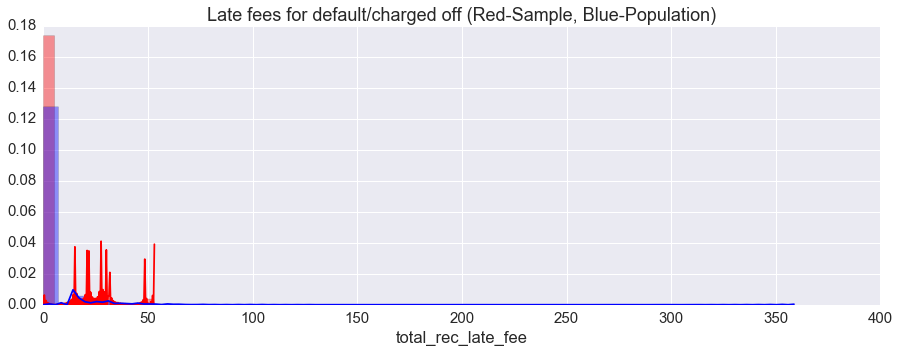

In [74]:
plt.figure(figsize=([15,5]))
plt.title('Late fees for default/charged off (Red-Sample, Blue-Population)')
sns.distplot(default_chargedoff_sample_df.total_rec_late_fee,color='red')
sns.distplot(loan_remove_col_default_chargedoff_df.total_rec_late_fee,color='blue');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


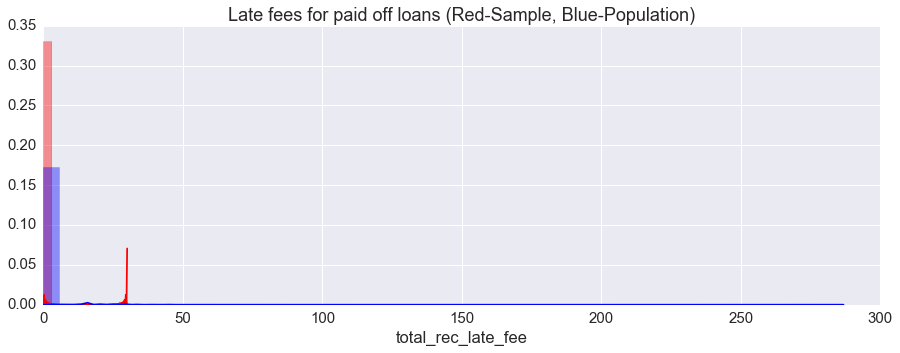

In [75]:
plt.figure(figsize=([15,5]))
plt.title('Late fees for paid off loans (Red-Sample, Blue-Population)')
sns.distplot(paidoff_sample_df.total_rec_late_fee,color='red')
sns.distplot(loan_removecol_paid_df.total_rec_late_fee,color='blue');

We can see that there are fewer extreme values in our sample histogram (red) compared to our population histrogram (blue) for recovered late fees. The right tail for the poulation is significantly longer than the tail for the sample. Since we have such a large skew, we could limit out sample size to late fees collected between 0-50 dollars to have a better idea of the distribution (greater than 0 and less than 50).

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


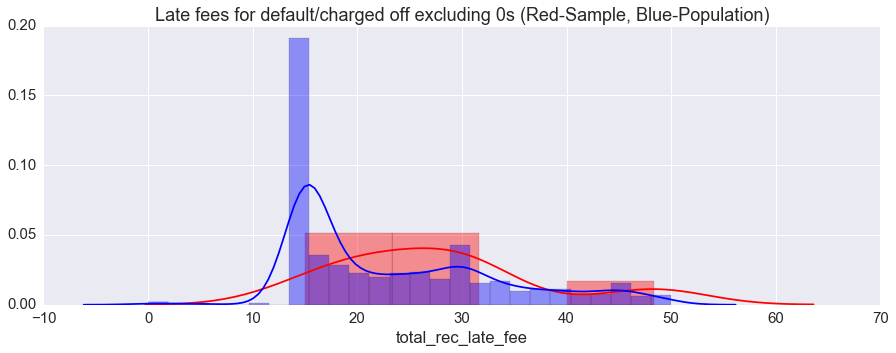

In [76]:
plt.figure(figsize=([15,5]))
plt.title('Late fees for default/charged off excluding 0s (Red-Sample, Blue-Population)')
less_than_50_s = default_chargedoff_sample_df.loc[(default_chargedoff_sample_df.total_rec_late_fee<50) & (default_chargedoff_sample_df.total_rec_late_fee>0),'total_rec_late_fee']
less_than_50_p = loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.total_rec_late_fee<50) &(loan_remove_col_default_chargedoff_df.total_rec_late_fee>0),'total_rec_late_fee']
sns.distplot(less_than_50_s,color='red')
sns.distplot(less_than_50_p,color='blue');

- When we exclude zero ,which is the overwhelming majority of loans, we see than on average late fees collected average around 11-12. We can see the differences between the sample and the population above (for default/charged off loans).

# Compare population and sample statistics for debt to income ratio (dti) for default/charged off and paid off loans.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


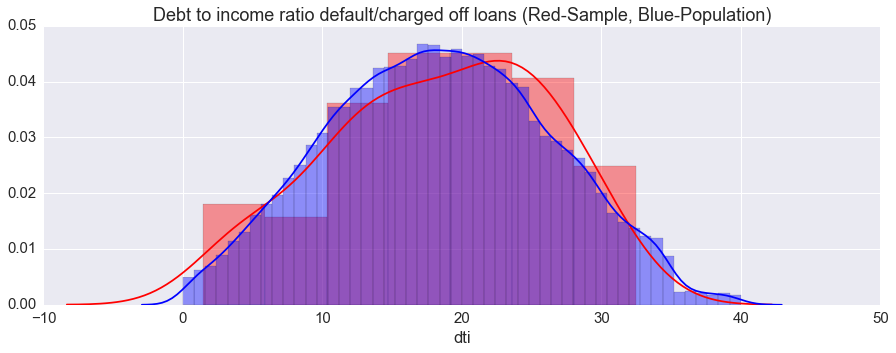

In [77]:
plt.figure(figsize=([15,5]))
plt.title('Debt to income ratio default/charged off loans (Red-Sample, Blue-Population)')
sns.distplot(default_chargedoff_sample_df.dti,color='red')
sns.distplot(loan_remove_col_default_chargedoff_df.dti,color='blue');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


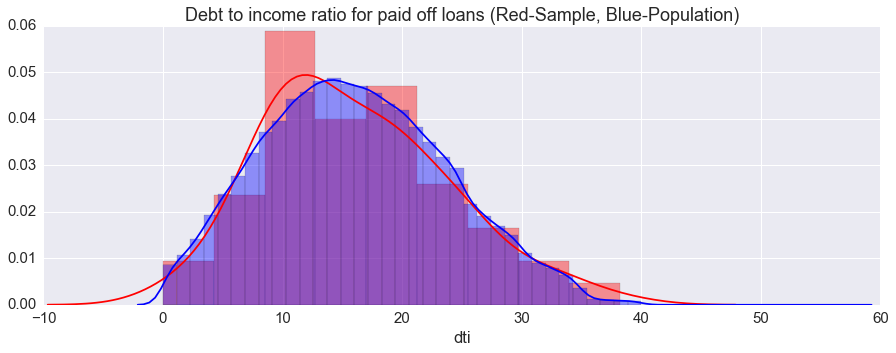

In [78]:
plt.figure(figsize=([15,5]))
plt.title('Debt to income ratio for paid off loans (Red-Sample, Blue-Population)')
sns.distplot(paidoff_sample_df.dti,color='red')
sns.distplot(loan_removecol_paid_df.dti,color='blue');

- Here, our sample values show the characteristics of a t-distribution, shorter peark and fatter tails. This is due to the central limit theorem, as the number of samples increases, your sampling distribution approximates a normal distribution for the population. In our case, our population (blue) represent an almost normal distribution ( with some right skew).

# Random variables and distributions

- Here, different variables will be examined to determine what types of distributions they follow. 
- First, I will categorize each variable and assign a distribution to it. This will be done with the TOTAL group ( not the individual sub groups).

- Note, loan_amnt, funded_amnt, and funded_amnt_inv are nearly identical and therefore only loan_amnt will be considered.


In [79]:
from scipy import stats

In [80]:
#loan_removecol_paid_df = loan_removecol_paid_df.drop(['index'],axis=1)
loan_removecol_paid_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_

# I will add a dummary variable here for our paid off group =1 default charged off =0. In addition, I will create a new dataframe with both of these groups combined.

In [81]:
loan_removecol_paid_df['paid_off']=1
loan_remove_col_default_chargedoff_df['paid_off']=0
loan_removecol_total_df = pd.concat([loan_remove_col_default_chargedoff_df,loan_removecol_paid_df])

In [82]:
loan_removecol_total_df.total_rec_late_fee.describe()

count    254190.000000
mean          0.720296
std           5.443488
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


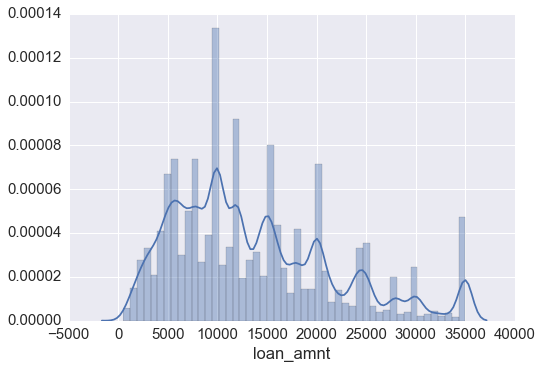

In [83]:
sns.distplot(loan_removecol_total_df.loan_amnt)

> loan_amnt
- Discrete
- Range: 0 to 35,000
- Large right skew
- Multimodial
- Mean: 13,570
- STD: 8,133


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


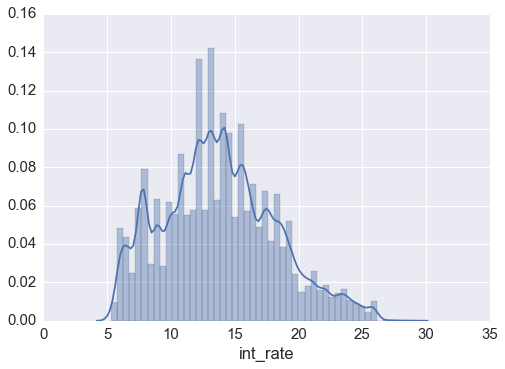

In [84]:
sns.distplot(loan_removecol_total_df.int_rate)


> int_rate
- Discrete
- Range: 5.3% to 28.9%
- Large right skew
- Multimodial
- Mean: 13.776014%
- STD: 4.4%


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


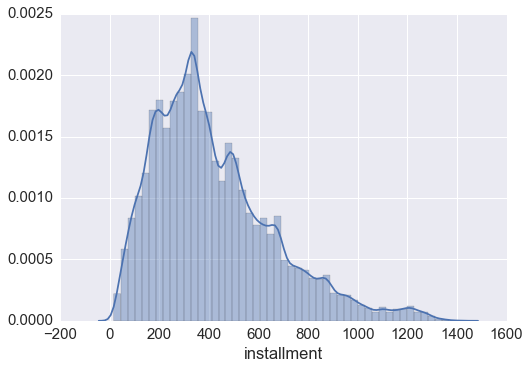

In [85]:
sns.distplot(loan_removecol_total_df.installment)
#Installment is the monthly payments owed by the borrower

>Installment
- Discrete
- Range: 15.69 to 1,424
- Large right skew
- Multimodial
- Mean: 418.273195
- STD: 244.91


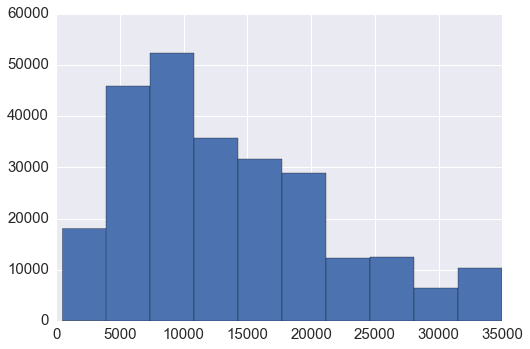

In [86]:
 
plt.hist(loan_removecol_total_df.loan_amnt,bins=10);

>annual_inc
- Discrete
- Range: 3,000 - 8,706,582
- Right skew
- Multimodial
- Mean: 72,510
- STD: 58,785


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


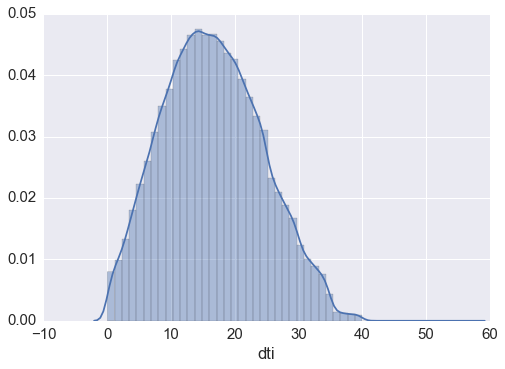

In [87]:
sns.distplot(loan_removecol_total_df.dti)

>dti (debt to income ratio)
- Discrete
- Range: 0 - 57.14
- Slight right skew
- Possible unimodal
- Mean: 16.5
- STD: 7.79


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


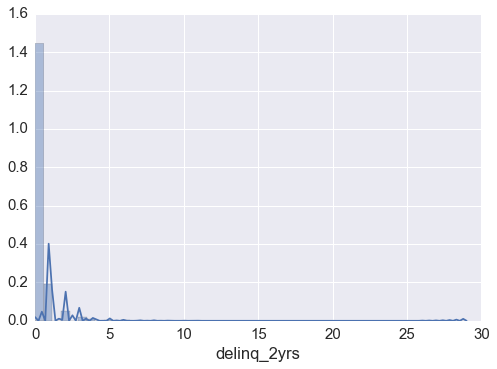

In [88]:
sns.distplot(loan_removecol_total_df.delinq_2yrs)

>delinq_2yrs
- Discrete
- Range: 0 - 29
- Large right skew
- Multimodial
- Mean: .25
- STD: .74


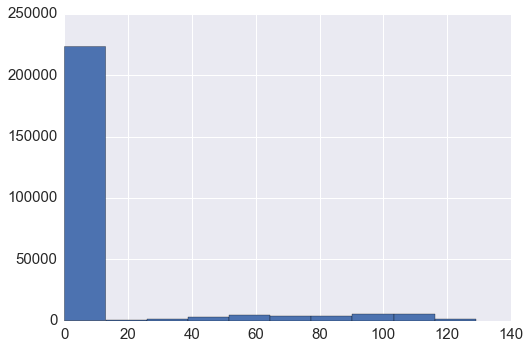

In [89]:
plt.hist(loan_removecol_total_df.mths_since_last_record);

>mths_since_last_record
- Discrete
- Range: 0 - 120
- Large right skew
- Multimodial
- Mean: 9.477
- STD: 27.16



/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


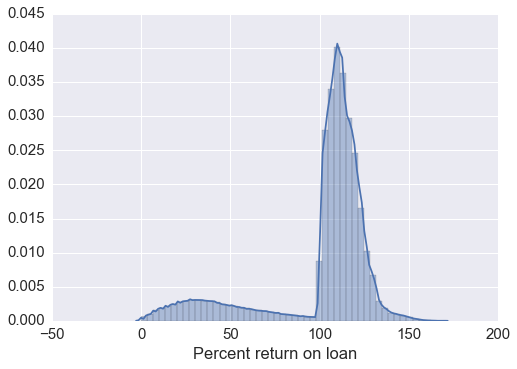

In [90]:
#percent return on a toal is total payment / funded amount
sns.distplot( loan_removecol_total_df.total_pymnt / loan_removecol_total_df.funded_amnt * 100)
plt.xlabel('Percent return on loan'); 

In [91]:
(loan_removecol_total_df.total_pymnt / loan_removecol_total_df.funded_amnt * 100).describe()

count    254190.000000
mean        101.089523
std          30.148847
min           0.000000
25%         103.010219
50%         110.184462
75%         117.416996
max         168.885204
dtype: float64

>Percent return on loan
- Bimodial distribution (as expected with people who have defaulted/charged off their loans)
- Continuous
- Right and left skew (for each distibution)
- Mean: 101%
- STD : 30%

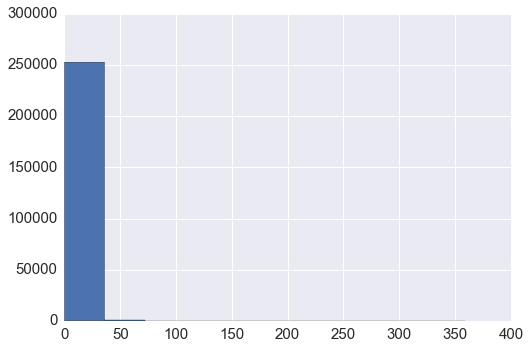

In [92]:
plt.hist(loan_removecol_total_df.total_rec_late_fee,bins=10  );

>total_rec_late_fee
- Discrete
- Range: 0 - 358
- Large right skew
- Unimodial
- Mean: .72
- STD: 5.44



 36 months


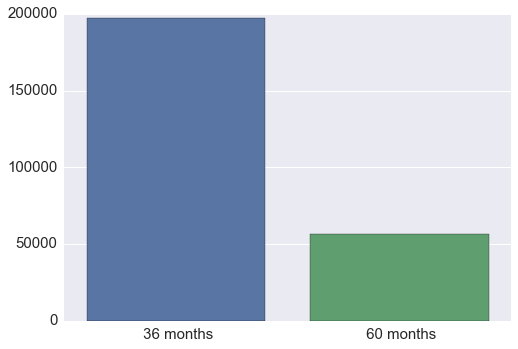

In [93]:
print(loan_removecol_total_df.term.value_counts().index[0])
y =[loan_removecol_total_df.term.value_counts()[0],loan_removecol_total_df.term.value_counts()[1]]
x = [loan_removecol_total_df.term.value_counts().index[0],loan_removecol_total_df.term.value_counts().index[1]]
sns.barplot(x=x,y=y);


>term
- Discrete (categorical)
- Range: 36 or 60
- binomial



In [94]:
print(loan_removecol_total_df.grade.value_counts().index[0])

B


B
C
A
D
E
F
G


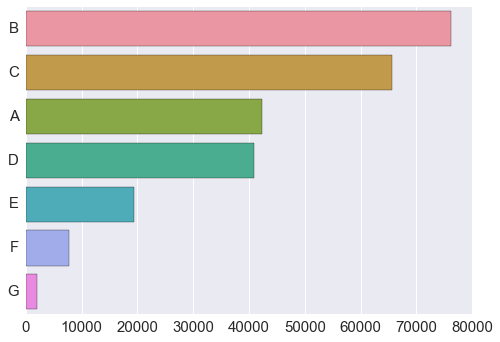

In [95]:
loan_removecol_total_df.grade.value_counts()
x2 = []
y2=[]
for number in loan_removecol_total_df.grade.value_counts():
    x2.append(number)
for label  in loan_removecol_total_df.grade.value_counts().index:
    print(label)
    y2.append(label)
y2
sns.barplot(x=x2,y=y2)

>grade
- Discrete (categorical)
- Range: A,B,C,D,E,F,G




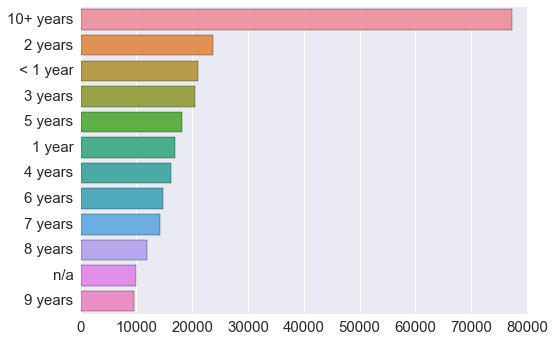

In [96]:
loan_removecol_total_df.emp_length.value_counts()
x3 = []
y3 = []

for number in loan_removecol_total_df.emp_length.value_counts():
    x3.append(number)

for length in loan_removecol_total_df.emp_length.value_counts().index:
    y3.append(length)
    
sns.barplot(x=x3,y=y3)

>emp_length
- Discrete (categorical)
- Range: <1yr,1yr ,2yr, 3yr ,4yr, 5yr, 6yr, 7yr, 8yr, 9yr, 10+yr, N/A
- Majority are 10+ years




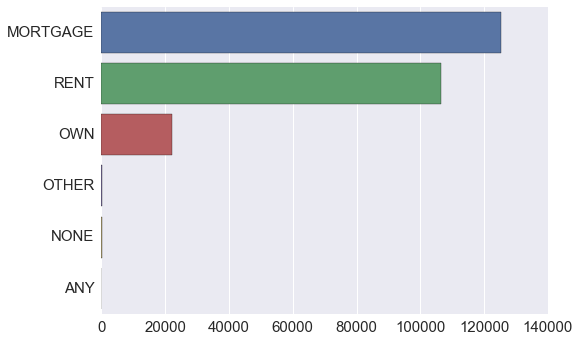

In [97]:
loan_removecol_total_df.home_ownership.value_counts()
x4 = []
y4 = []

for number in loan_removecol_total_df.home_ownership.value_counts():
    x4.append(number)

for length in loan_removecol_total_df.home_ownership.value_counts().index:
    y4.append(length)
    
sns.barplot(x=x4,y=y4)

>home_ownership
- Discrete (categorical)
- Range: Mortgage, Rent, Own, Other, None, Any
- Majority are mortgage




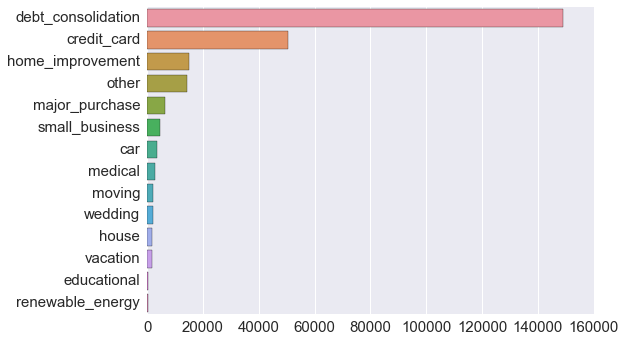

In [98]:
#purpose 

loan_removecol_total_df.purpose.value_counts()
x5 = []
y5 = []

for number in loan_removecol_total_df.purpose.value_counts():
    x5.append(number)

for length in loan_removecol_total_df.purpose.value_counts().index:
    y5.append(length)
    
sns.barplot(x=x5,y=y5)

>purpose
- Discrete (categorical)
- Range: debt_consolidation, credit_card, home_improvement, other, major_purchase, small_business, car, medicial ,moving, wedding, house, vacation, educational, renewable_energy
- Majority are debt_consolidation




CA    43321
NY    21444
TX    19454
FL    17640
NJ     9650
IL     9281
PA     8438
GA     8050
VA     7971
OH     7778
NC     6952
MA     6168
AZ     6116
MD     6030
MI     6028
WA     5937
CO     5638
MN     4480
MO     3970
NV     3836
CT     3689
OR     3361
AL     3156
WI     3092
LA     2970
SC     2833
IN     2819
TN     2448
KY     2283
OK     2139
UT     2120
KS     2088
AR     1762
HI     1486
NM     1385
NH     1151
WV     1143
RI     1092
DC      839
MT      742
DE      672
AK      665
WY      603
SD      545
VT      429
MS      425
NE       38
ME       13
ND        8
ID        6
IA        6
Name: addr_state, dtype: int64


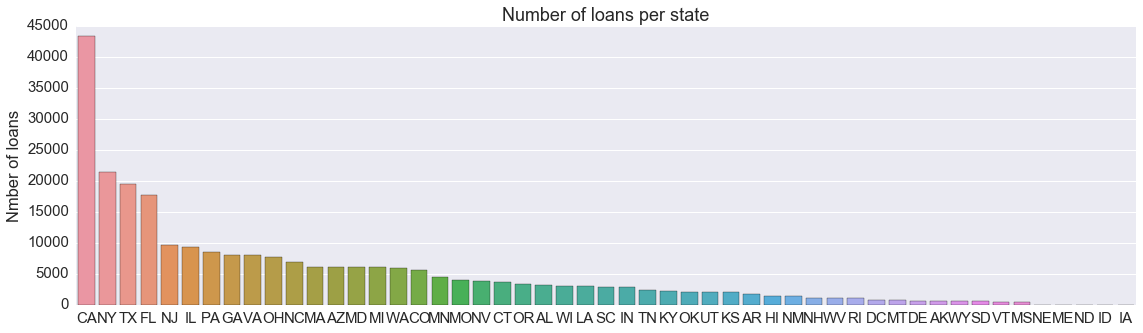

In [99]:
#addr_state 


#purpose 

print(loan_removecol_total_df.addr_state .value_counts())
x6 = []
y6 = []

for number in loan_removecol_total_df.addr_state.value_counts():
    x6.append(number)

for length in loan_removecol_total_df.addr_state .value_counts().index:
    y6.append(length)
plt.figure(figsize=(19,5))    
sns.barplot(x=y6,y=x6)
plt.title('Number of loans per state')
plt.ylabel('Nmber of loans')


>State

- Range (50 states)
- Discrete (categorical)
- Majority are California

## The other variables of are less importance for this analysis.

In [100]:
loan_removecol_total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254190 entries, 0 to 207722
Data columns (total 57 columns):
loan_amnt                      254190 non-null float64
funded_amnt                    254190 non-null float64
funded_amnt_inv                254190 non-null float64
term                           254190 non-null object
int_rate                       254190 non-null float64
installment                    254190 non-null float64
grade                          254190 non-null object
sub_grade                      254190 non-null object
emp_title                      254190 non-null object
emp_length                     254190 non-null object
home_ownership                 254190 non-null object
annual_inc                     254190 non-null float64
verification_status            254190 non-null object
issue_d                        254190 non-null object
loan_status                    254190 non-null object
pymnt_plan                     254190 non-null object
url                

# Fit distributions to some of our variables

- First, let's examine debt to income ratios for default/charged off and paid off loans

In [101]:
print(loan_data_removecol_df.dti.mean(), 'mean dti')
print(loan_data_removecol_df.dti.std(),'std dti ')
dti_normal = stats.norm(loan_data_removecol_df.dti.mean(),loan_data_removecol_df.dti.std())

16.560533931311213 mean dti
7.794390100390713 std dti 


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


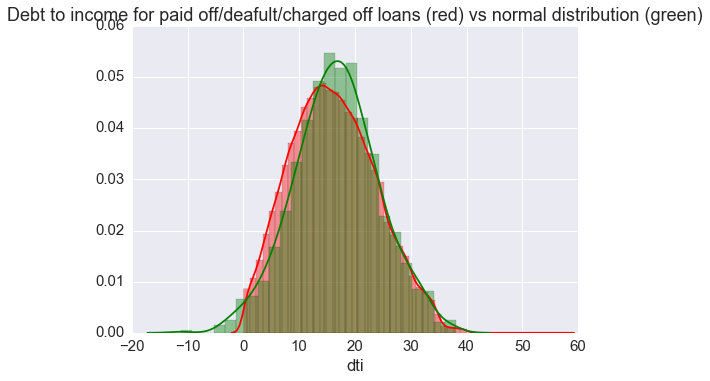

In [102]:
#loan_data_removecol_df.annual_inc
plt.title('Debt to income for paid off/deafult/charged off loans (red) vs normal distribution (green)')
sns.distplot(loan_removecol_paid_df.dti,color='red')
sns.distplot(dti_normal.rvs(1000),color='green');

In [103]:
dti_normal.cdf(10)

0.19997810055938803

- The debt to income ratio appears to resemble a normal distribution with mean centered at 16.5 and standard deviation at 7.79. Using the cdf of the normal distribution, we see that there is a 20% chance of have a dti of 10 or less.

### Next, the variable months since last deliquency will be examined (for default/charged off/paid off loans).

In [104]:
#loan_data_removecol_df.mths_since_last_delinq.mean()


fit_alpha, fit_loc, fit_beta=stats.gamma.fit(loan_data_removecol_df.mths_since_last_delinq)
print(fit_alpha,'alpha fit',fit_beta,' beta fit',fit_loc, ' location fit')
fitted_gamma = stats.gamma(fit_alpha, fit_loc, fit_beta)
#x= arange(10000)
#fitted_gamma_pdf =fitted_gamma.pdf(x)

0.377527540528 alpha fit 15.3360146154  beta fit -2.92078838542e-27  location fit


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


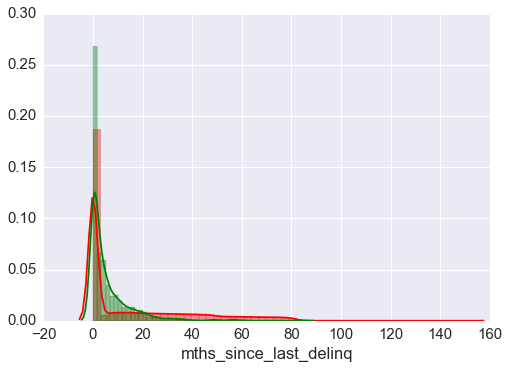

In [105]:
sns.distplot(loan_data_removecol_df.mths_since_last_delinq,color='red')
sns.distplot(fitted_gamma.rvs(1000),color='green');

In [106]:
1-fitted_gamma.cdf(10)

0.18569992169499761

- Months since last delinqency follows a gamma distribution with mean centered around 0, alpha = .377, and beta = -2.92. Using the CDF of this distribution, we can find probability than any given loan (that has defaulted, charged off, or bee paid off) has more than 10 months since the borrower's last delinquency, which is ~18.6%.
 

# Hypothesis testing

> Hypothesis one: There is no relationship between interest rate and the state between a sample of 1000 loans and the population of loans. This will only look at loans in our sample. We will look at only CA for this hypothesis at a 95% confidence level.
- Ho= CA interest rate in the same for sample and population
- Ha = CAinterest rate is NOT the same for sample and population

In [107]:
#First, take a sample of our dataframe
loan_removecol_total_sample_ca_df= loan_removecol_total_df[loan_removecol_total_df.addr_state=='CA'].sample(1000)



In [108]:
#sample
sample_state_interest =loan_removecol_total_sample_ca_df.int_rate
#

In [109]:
# population

pop_state_interest =loan_removecol_total_df[loan_removecol_total_df.addr_state=="CA"].int_rate
#pop_state_interest

>Next, calculate a t-statistic for each sample compared to the population.

In [110]:
state_interest_diff = (sample_state_interest.mean()- pop_state_interest.mean())

print(state_interest_diff)
#drop nulls (state not present in sample)


-0.21211350776713012


In [111]:
state_interest_diff

-0.21211350776713012

In [112]:
from math import sqrt

In [113]:
state_interest_sample_std = np.std(sample_state_interest)
state_interest_se = state_interest_sample_std/sqrt(len(sample_state_interest))
state_interest_se

0.13310388177322252

>T-test at 95% confidence level

In [114]:
t_value_state_interest_diff= state_interest_diff / state_interest_se
t_value_state_interest_diff

-1.593593702462572

> Above is our t-score. We can look at the probably of this using the t-distribution

In [115]:
from scipy.stats import  t

In [116]:
t(1000-1).cdf(t_value_state_interest_diff)

0.055671692270226801

>Above, we see that our p-value is significantly larger than 2.5% (2.5% because there are two tails of our test). Therefore, we failt to reject our null hypothesis that there is not difference between the interest rate of a sample and our population for CA.

## Even though we failed to reject our null with a sample size of 1,000, if we tok a smaller sample we might have more evidence to reject our null (due to less variation of the data captured). I will explore that below.

In [117]:
#First, take a sample of our dataframe with size 100 this time
loan_removecol_total_sample100_ca_df= loan_removecol_total_df[loan_removecol_total_df.addr_state=='CA'].sample(100)

#sample
sample_state100_interest =loan_removecol_total_sample100_ca_df.int_rate
#

In [118]:
#Same population interest rate as above

In [119]:
state_interest_sample100_std = np.std(sample_state_interest)
state_interest100_se = state_interest_sample100_std/sqrt(len(sample_state100_interest))

In [120]:
state_interest100_diff = (sample_state100_interest.mean()- pop_state_interest.mean())

In [121]:
t_value_state100_interest_diff= state_interest100_diff / state_interest_se
t_value_state100_interest_diff

3.905644864051376

In [122]:
t(100-1).cdf(t_value_state100_interest_diff)

0.99991408748122712

> With a smaller sample size, our p-value is less than .025 (1-the cdf probably above) which is the rejection region for each tail. Therefore, we reject our null that the interest rate of CA for our sample is the same as our interest rate for CA in the population.

> #### Hypothesis two
- On the lending club website, it states that 99.8% of people earn a positive return on their investment. We will test whether that claim is true for different samples of loans (within default/charged off or paid). 
- Each sample will be 100 loans at 25 dollars each (the average investment for people on Lending Club).
- We will run 100 trials.
- In order to determine return, look at the 'percent_paid_of_loan' column multipled by 25 dollars.
- Ho = People do in fact receive a positive return 99.8% of the time
- Ha = People do NOT receive a positive return 99.8% of the time

In [123]:
#Add a percent paid column. This is the total payment received for the loan over the total funded amount
loan_removecol_total_df['percent_paid_of_loan']=(loan_removecol_total_df.total_pymnt / loan_removecol_total_df.funded_amnt)
loan_remove_col_default_chargedoff_df['percent_paid_of_loan'] = \
(loan_remove_col_default_chargedoff_df.total_pymnt/loan_remove_col_default_chargedoff_df.funded_amnt)

loan_removecol_paid_df['percent_paid_of_loan']= \
(loan_removecol_paid_df.total_pymnt/loan_removecol_paid_df.funded_amnt)

In [124]:
def percent_return(dataframe,number_of_notes=100,size_of_notes=25,percent_threshold=.998):
    """Take random sample of the dataframe. Compare the return of these loans. Calculate the t-statistic for 
    average return of sample versus the population percent_threshold. Will return the p-value associated with your test."""
    sample = dataframe.sample(number_of_notes)
    
    total_invested = number_of_notes*size_of_notes
    total_return = 0
    count = 0
    for percent_return in sample.percent_paid_of_loan:
        count+=1
        #print(percent_return,'percent return')
        total_return += (percent_return *size_of_notes)
    percent_return = total_return/total_invested
    
    sample_percent_return_var = np.var(sample.percent_paid_of_loan)
    
    sample_se = sqrt(  sample_percent_return_var / number_of_notes)
    t_stat = ((percent_return-percent_threshold) / sample_se )
    if t_stat>0:
        return (1-t(number_of_notes-1).cdf(t_stat))
    else:
        return (t(number_of_notes-1).cdf(t_stat))
    

In [125]:
percent_return(loan_removecol_total_df)

0.36507474967627074

In [126]:
p_values_return_test = [percent_return(loan_removecol_total_df) for _ in range(1000)]

In [127]:
#statsmodels.sandbox.stats.multicomp.multipletests   Correct the p-values for having multiple tests
sm.sandbox.stats.multicomp.multipletests(p_values_return_test,alpha = .05, method = 'bonferroni')

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [128]:
#False discovery rate
sm.sandbox.stats.multicomp.multipletests(p_values_return_test,alpha = .05, method = 'fdr_bh')

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

## For each type of p-value correction, bonferroni and FDR, we want to see only two (or fewer) out of 1,000 trials reject the null hypothesis with an alpha at .05 in order to accept that 99.8% of people earn a positive return.

In [129]:
#Bonferroni
count_of_true_bf = 0
count_of_false_bf = 0

for p_val in sm.sandbox.stats.multicomp.multipletests(p_values_return_test,alpha = .05, method = 'bonferroni')[0]:
    if p_val == True:
        #print(p_val)
        count_of_true_bf +=1
    if p_val == False:
        count_of_false_bf +=1
print(count_of_true_bf )


4


> In 1,000 trials there were four triasl that we would reject using a bonferroni correction. Therefore, since we would only expect two trials to fail in a sample of 1,000 trials, we reject the null hypothesis that 99.8% of people make a positive return. However, bonferroni is known to be very aggressive to minimize type one error. FDR is a more reasonable approach to hypothesis testing.

In [130]:
#FDR - https://en.wikipedia.org/wiki/False_discovery_rate#Benjamini.E2.80.93Hochberg_procedure
count_of_true_fdr = 0
count_of_false_fdr = 0

for p_val in sm.sandbox.stats.multicomp.multipletests(p_values_return_test,alpha = .05, method = 'fdr_bh')[0]:
    if p_val == True:
        #print(p_val)
        count_of_true_fdr +=1
    if p_val == False:
        count_of_false_fdr +=1
print(count_of_true_fdr )


14


> ## Here, we see that we would reject the null hypothesis that 99.8% of people earn a return (using an FDR method). With an FDR method, 1,000 trials of 100 loans of size 25, only 98.5% of people earned a positive return.

## Hypothesis Three
- The number of paid loans are independent of state.
- Ho is the number of paid loans is independent of state
- Ha is that the number of paid loans is not independent of state.
- We will use a chisquare test to evaluate this claim
- In addition, we will only look at loans that originated earlier thans 2013 (in order to give at least three years for people to pay off their loans).



In [131]:
loan_removecol_total_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_

In [132]:
loan_removecol_total_df.issue_d.head()

0    Dec-2011
1    Sep-2011
2    Jul-2011
3    Jun-2011
4    Jun-2011
Name: issue_d, dtype: object

In [133]:
loan_removecol_total_df.issue_d= pd.to_datetime(loan_removecol_total_df.issue_d )

loan_removecol_total_df.issue_d = pd.to_datetime(loan_removecol_total_df.issue_d )
loan_removecol_total_df['year'] = pd.DatetimeIndex(loan_removecol_total_df['issue_d']).year

In [134]:
loan_2008_2012_total_df = loan_removecol_total_df[loan_removecol_total_df.year<2013]
loan_2008_2012_total_df.year.unique()

array([2011, 2010, 2012, 2009, 2008, 2007])

In [135]:
#Get the total number of paid off loans per state
state_count_of_paid = loan_2008_2012_total_df.groupby('addr_state').paid_off.sum().reset_index()
state_count_of_paid = state_count_of_paid.rename_axis({'paid_off':'count_of_paid_off_loans'},axis=1)
state_count_of_paid

,addr_state,count_of_paid_off_loans
0,AK,207
1,AL,875
2,AR,523
3,AZ,1643
4,CA,13101
5,CO,1449
6,CT,1262
7,DC,347
8,DE,186
9,FL,5238


In [136]:
#Find the average default rate per state
state_cout_of_total_loans =loan_2008_2012_total_df.groupby('addr_state').paid_off.count().reset_index()
state_cout_of_total_loans = state_cout_of_total_loans.rename_axis({'paid_off':'total_number_of_loans'},axis=1)
state_cout_of_total_loans.head(20)

,addr_state,total_number_of_loans
0,AK,240
1,AL,1054
2,AR,623
3,AZ,1965
4,CA,15626
5,CO,1685
6,CT,1483
7,DC,373
8,DE,220
9,FL,6432


In [137]:
#Find the average default rate for the nation for 2008 to 2012
national_default_rate = loan_2008_2012_total_df.paid_off.sum() / loan_2008_2012_total_df.paid_off.count()
national_default_rate

0.8431720584025193

In [138]:
observed = (state_count_of_paid.count_of_paid_off_loans)
expected = (state_cout_of_total_loans.total_number_of_loans) * national_default_rate
stats.chisquare(observed,expected)

Power_divergenceResult(statistic=31.129246937648936, pvalue=0.97821205630224073)

> Here, we see a p-value of 97.8%. This means we fail to reject the null that there is a significant difference between then default rate for different states in the US from 2007-2012.

[(207, 'observed paid off loan', 202.36129401660463, 'expected paid off loan'), (875, 'observed paid off loan', 888.70334955625538, 'expected paid off loan'), (523, 'observed paid off loan', 525.29619238476948, 'expected paid off loan'), (1643, 'observed paid off loan', 1656.8330947609504, 'expected paid off loan'), (13101, 'observed paid off loan', 13175.406584597766, 'expected paid off loan'), (1449, 'observed paid off loan', 1420.744918408245, 'expected paid off loan'), (1262, 'observed paid off loan', 1250.424162610936, 'expected paid off loan'), (347, 'observed paid off loan', 314.50317778413972, 'expected paid off loan'), (186, 'observed paid off loan', 185.49785284855426, 'expected paid off loan'), (5238, 'observed paid off loan', 5423.2826796450045, 'expected paid off loan'), (2376, 'observed paid off loan', 2396.2949899799601, 'expected paid off loan'), (381, 'observed paid off loan', 390.38866304036645, 'expected paid off loan'), (5, 'observed paid off loan', 4.21586029201259

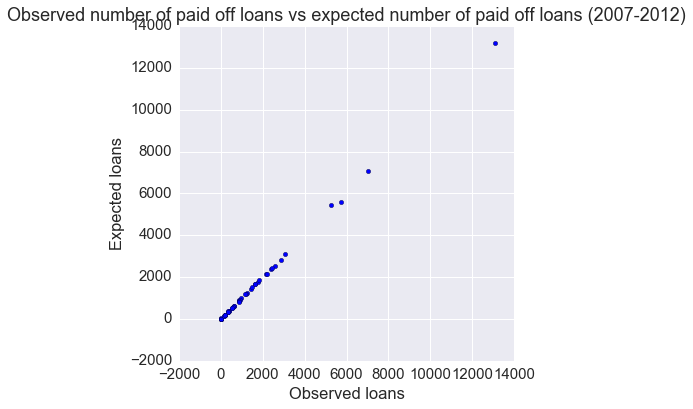

In [139]:
print([(x,'observed paid off loan',y,'expected paid off loan') for (x,y) in zip(observed,expected)])
#plt.plot(observed,color='green')
plt.figure(figsize=(6,6))
plt.scatter(observed,expected)
#plt.plot(expected[0:4])
#s#ns.barplot()
plt.title('Observed number of paid off loans vs expected number of paid off loans (2007-2012)')
plt.xlabel('Observed loans')
plt.ylabel('Expected loans')

In [140]:
stats.chisquare(1516,1511)

Power_divergenceResult(statistic=0.016545334215751158, pvalue=nan)

# Multiple Linear Regression

> In order to use linear regression, and multiple linear regression, we will have to add dummy variables for our categorical variables present in our data. However, some our of columns do not make sense to use dummy variables on (because they contain time or location data). Therefore, the following columns will be dropped. In addition, columns with a time component, or text, will be dropped. This will make it easier to create dummy variables
- emp_title
- sub_grade
- earliest_cr_line 
- ['index',
- ' issue_d',
- ' url',
- 'desc'
- 'title'
- 'zip_code'
- 'addr_state
- 'initial_list_status',
-  last_pymnt_d'
- 'next_pymnt_d',
- 'last_credit_pull_d']

>First, we will try to predict the interest rate from the features available in our data set.

In [141]:
loan_removetime_total_df=loan_removecol_total_df

In [142]:
#remove additional columns that have a time component
# We also will not know loan status to predict interest rate
# We also will not konw the grade of the loan (this would be given in combination with the interest rate)
#In addition, we will not know anything about the person's payment history

loan_removetime_total_df =loan_removecol_total_df.drop(['issue_d','url','desc','title','zip_code','addr_state','initial_list_status',\
                              'last_pymnt_d','next_pymnt_d','last_credit_pull_d','loan_status',\
                                                       'grade','last_pymnt_d','last_pymnt_amnt',\
                                                        'next_pymnt_d','total_pymnt','total_pymnt_inv',\
                                                        'total_rec_prncp',\
                                                          'total_rec_int','total_rec_late_fee','tot_coll_amt',\
                                                       'tot_cur_bal','out_prncp','out_prncp_inv','emp_title','sub_grade','earliest_cr_line'],axis=1)

In [143]:
loan_removetime_total_df= pd.get_dummies(loan_removetime_total_df)

In [144]:
loan_removetime_total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254190 entries, 0 to 207722
Data columns (total 69 columns):
loan_amnt                                    254190 non-null float64
funded_amnt                                  254190 non-null float64
funded_amnt_inv                              254190 non-null float64
int_rate                                     254190 non-null float64
installment                                  254190 non-null float64
annual_inc                                   254190 non-null float64
dti                                          254190 non-null float64
delinq_2yrs                                  254190 non-null float64
inq_last_6mths                               254190 non-null float64
mths_since_last_delinq                       254190 non-null float64
mths_since_last_record                       254190 non-null float64
open_acc                                     254190 non-null float64
pub_rec                                      254190 non-null 

> Now, due to linear dependence, I will remove one column from each collection of dummy variables (If you have 7 columns, with only 6 of those columns you can tell if the 7th is is 1 or 0).

##### Columns to drop
- term_ 60 months (if 36 months is 0)        
- emp_length_n/a (If all other employement lengths are 0)
- home_ownership_NONE (If all other home ownership categories are 0)
- verification_status_Not Verified (If all other verified columns are 0)
- pymnt_plan_n (if pymnt_plan_y =0)
- purpose_wedding (if other purposes are 0)
- application_type_JOINT (If application type individual is 0)


In [145]:
loan_removetime_total_df.drop(['term_ 60 months','emp_length_n/a','home_ownership_NONE',\
                               'verification_status_Not Verified','pymnt_plan_n',\
                               'pymnt_plan_n','purpose_wedding','application_type_JOINT'],inplace=True,axis=1)

#### Now, we are ready to predict interest rate.

In [146]:
loan_removetime_total_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
       'total_rev_hi_lim', 'paid_off', 'percent_paid_of_loan', 'year',
       'term_ 36 months', 'emp_length_1 year', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       '

In [147]:

X1 = loan_removetime_total_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
       'total_rev_hi_lim', 'paid_off', 'term_ 36 months', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'pymnt_plan_y', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'application_type_INDIVIDUAL',
       'verification_status_joint_0',
       'verification_status_joint_Source Verified']]
y1 = loan_removetime_total_df['int_rate']
X1 = smf.add_constant(X1)
X1['constant']=1

model1 = smf.OLS(y1,X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     7449.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:06:37   Log-Likelihood:            -6.1408e+05
No. Observations:              254190   AIC:                         1.228e+06
Df Residuals:                  254133   BIC:                         1.229e+06
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
loan_amnt                                    -0.0002   9.71e-06    -23.064      0.000        -0.000    -0.000
funded_amnt                                  -0.0013   1.28e-05    -99.382      0.000        -0.001    -0.001
funded_amnt_inv                            3.852e-05   6.54e-06      5.893      0.000      2.57e-05  5.13e-05
installment                                   0.0467      0.000    320.782      0.000         0.046     0.047
annual_inc                                -2.457e-06   1.05e-07    -23.335      0.000     -2.66e-06 -2.25e-06
dti                                           0.0249      0.001     31.196      0.000         0.023     0.026
delinq_2yrs                                   0.3964      0.007     53.151      0.000         0.382     0.411
inq_last_6mths                                0.6030      0.005    115.087      0.000         0.593     0.613
mths_since_last_delinq                        0.0072      0.000     26.280      0.000         0.007     0.008
mths_since_last_record                        0.0034      0.000     10.727      0.000         0.003     0.004
open_acc                                      0.0645      0.002     40.626      0.000         0.061     0.068
pub_rec                                       0.4871      0.020     24.787      0.000         0.449     0.526
revol_bal                                 -1.604e-05   4.62e-07    -34.757      0.000     -1.69e-05 -1.51e-05
revol_util                                    0.0440      0.000    166.798      0.000         0.044     0.045
total_acc                                    -0.0374      0.001    -56.488      0.000        -0.039    -0.036
recoveries                                    0.0002    1.3e-05     13.433      0.000         0.000     0.000
collection_recovery_fee                      -0.0003   7.92e-05     -4.330      0.000        -0.000    -0.000
collections_12_mths_ex_med                    0.7252      0.060     12.007      0.000         0.607     0.844
mths_since_last_major_derog                   0.0114      0.000     35.320      0.000         0.011     0.012
policy_code                                   8.8936      0.696     12.782      0.000         7.530    10.257
acc_now_delinq                                1.1158      0.089     12.476      0.000         0.941     1.291
total_rev_hi_lim                           5.412e-06   3.03e-07     17.857      0.000      4.82e-06  6.01e-06
paid_off                                     -0.6160      0.016    -38.439      0.000        -0.647    -0.585
term_ 36 months                             -11.1522      0.027   -416.607      0.000       -11.205   -11.100
emp_length_1 year                            -0.1985      0.035     -5.668      0.000        -0.267    -0.130
emp

## Next, remove all variables with a p-value <.05.

In [148]:

X2 = loan_removetime_total_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
       'total_rev_hi_lim', 'paid_off', 'term_ 36 months', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'home_ownership_MORTGAGE',
   
    
   'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business',
       'purpose_vacation', 'application_type_INDIVIDUAL',
       'verification_status_joint_0',
       'verification_status_joint_Source Verified']]
y2 = loan_removetime_total_df['int_rate']
X2['constant']=1

model2= smf.OLS(y2,X2).fit()
model2.summary()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     8602.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:06:41   Log-Likelihood:            -6.1488e+05
No. Observations:              254190   AIC:                         1.230e+06
Df Residuals:                  254141   BIC:                         1.230e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
loan_amnt                                    -0.0002   9.74e-06    -21.842      0.000        -0.000    -0.000
funded_amnt                                  -0.0013   1.28e-05   -100.518      0.000        -0.001    -0.001
funded_amnt_inv                            4.012e-05   6.54e-06      6.134      0.000      2.73e-05  5.29e-05
installment                                   0.0471      0.000    323.261      0.000         0.047     0.047
annual_inc                                -2.495e-06   1.06e-07    -23.637      0.000      -2.7e-06 -2.29e-06
dti                                           0.0276      0.001     34.684      0.000         0.026     0.029
delinq_2yrs                                   0.3924      0.007     52.456      0.000         0.378     0.407
inq_last_6mths                                0.6122      0.005    116.634      0.000         0.602     0.622
mths_since_last_delinq                        0.0072      0.000     26.043      0.000         0.007     0.008
mths_since_last_record                        0.0033      0.000     10.407      0.000         0.003     0.004
open_acc                                      0.0635      0.002     39.886      0.000         0.060     0.067
pub_rec                                       0.5066      0.020     25.759      0.000         0.468     0.545
revol_bal                                 -1.565e-05   4.63e-07    -33.813      0.000     -1.66e-05 -1.47e-05
revol_util                                    0.0440      0.000    166.187      0.000         0.043     0.044
total_acc                                    -0.0371      0.001    -55.854      0.000        -0.038    -0.036
recoveries                                    0.0002    1.3e-05     14.170      0.000         0.000     0.000
collection_recovery_fee                      -0.0004   7.94e-05     -4.918      0.000        -0.001    -0.000
collections_12_mths_ex_med                    0.7291      0.061     12.036      0.000         0.610     0.848
mths_since_last_major_derog                   0.0114      0.000     35.172      0.000         0.011     0.012
policy_code                                   8.7932      0.680     12.925      0.000         7.460    10.127
acc_now_delinq                                1.1262      0.090     12.553      0.000         0.950     1.302
total_rev_hi_lim                           5.105e-06   3.04e-07     16.808      0.000      4.51e-06   5.7e-06
paid_off                                     -0.6145      0.016    -38.235      0.000        -0.646    -0.583
term_ 36 months                             -11.2371      0.027   -422.878      0.000       -11.289   -11.185
emp_length_1 year                            -0.3932      0.035    -11.366      0.000        -0.461    -0.325
emp

> Here, we can see that are variables are significant predictors of interest rate.  of a linear regression.The R^2 of ~62% means that 62% of the variance of the model can be predicted by this regression. However, we are not ready to use this model yet.

> Next, check the assumptions of linear regression.
- 1) Linear relationship
- 2) Colinearity of coefficients
- 3) Normaly distributed residuals
- 4) Constant variance in y (homescedascity)

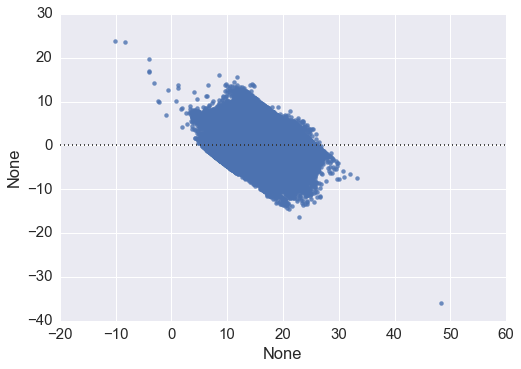

In [149]:
sns.residplot(model2.fittedvalues,model2.resid)

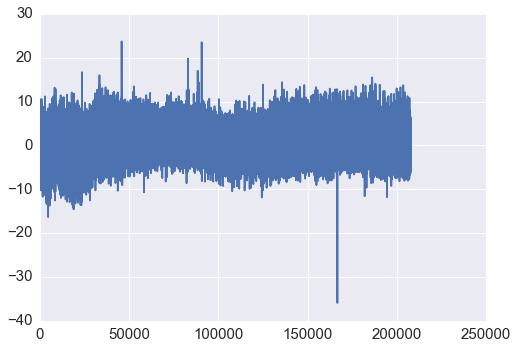

In [150]:
plt.plot(model2.resid)

In [151]:
#Remove variables with correlation >.5
# funded_amnt_inv, funded_amnt, installment
X2.corr()>.5

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,application_type_INDIVIDUAL,verification_status_joint_0,verification_status_joint_Source Verified,constant
loan_amnt,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
funded_amnt,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
funded_amnt_inv,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
installment,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
annual_inc,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dti,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
delinq_2yrs,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
inq_last_6mths,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
mths_since_last_delinq,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
mths_since_last_record,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


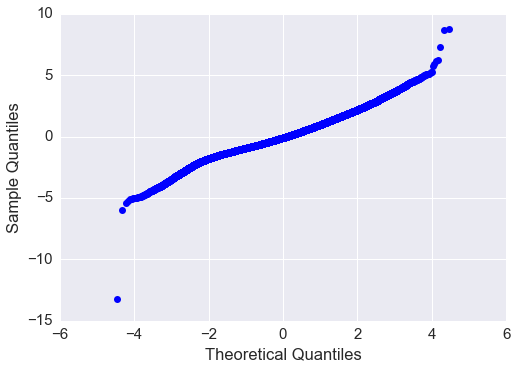

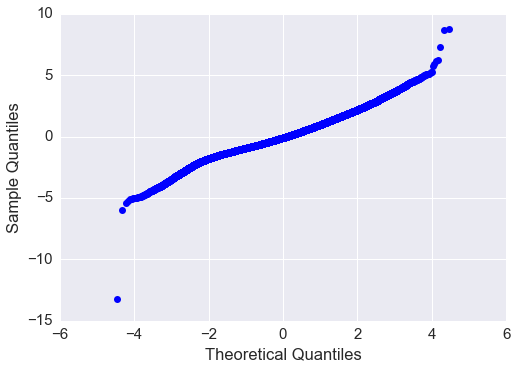

In [152]:
sm.graphics.gofplots.qqplot(model2.resid_pearson)

In [153]:
sm.stats.diagnostic.het_breushpagan(model2.resid,model2.model.exog)

(18367.228360893198, 0.0, 412.37410252529111, 0.0)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


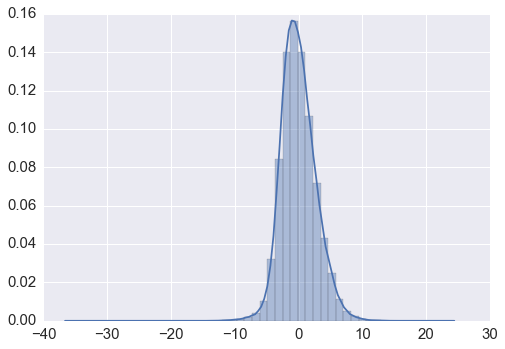

In [154]:
sns.distplot(model2.resid)

>Above, we see that 1) there is some multicolinearity in our model 2) Our errors are not normally distributed (Jarque-Bera p-value below .05) and 3) Heteroskedascity in our model (p-value below .05 for breushpagan test).

- Remove variables that are highly correlated to eachother.
    - funded_amnt_inv, funded_amnt, installment,verification_status_joint_0

In [155]:

X3 = loan_removetime_total_df[['loan_amnt', 
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
        'paid_off', 'term_ 36 months', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'home_ownership_MORTGAGE',
   
    
   'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business',
       'purpose_vacation', 
  
]]
#y2 = loan_removetime_total_df['int_rate']
y3 = loan_removetime_total_df['int_rate']
X3['constant'] =1


model3= smf.OLS(y3,X3).fit()
model3.summary()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     5050.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:06:56   Log-Likelihood:            -6.5903e+05
No. Observations:              254190   AIC:                         1.318e+06
Df Residuals:                  254146   BIC:                         1.319e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
loan_amnt                    5.503e-05    9.9e-07     55.578      0.000      5.31e-05   5.7e-05
annual_inc                  -3.267e-06   1.26e-07    -26.030      0.000     -3.51e-06 -3.02e-06
dti                             0.0367      0.001     38.825      0.000         0.035     0.039
delinq_2yrs                     0.5813      0.009     65.515      0.000         0.564     0.599
inq_last_6mths                  0.9088      0.006    147.875      0.000         0.897     0.921
mths_since_last_delinq          0.0117      0.000     35.811      0.000         0.011     0.012
mths_since_last_record          0.0052      0.000     13.987      0.000         0.005     0.006
open_acc                        0.1040      0.002     55.724      0.000         0.100     0.108
pub_rec                         0.6923      0.023     29.600      0.000         0.646     0.738
revol_bal                   -1.618e-05   3.98e-07    -40.712      0.000      -1.7e-05 -1.54e-05
revol_util                      0.0621      0.000    215.897      0.000         0.062     0.063
total_acc                      -0.0523      0.001    -66.385      0.000        -0.054    -0.051
recoveries                      0.0002   1.55e-05     15.722      0.000         0.000     0.000
collection_recovery_fee        -0.0005   9.44e-05     -5.817      0.000        -0.001    -0.000
collections_12_mths_ex_med      1.1205      0.072     15.554      0.000         0.979     1.262
mths_since_last_major_derog     0.0148      0.000     38.587      0.000         0.014     0.016
policy_code                     6.8844      0.041    166.330      0.000         6.803     6.965
acc_now_delinq                  1.9803      0.107     18.567      0.000         1.771     2.189
paid_off                       -0.9636      0.019    -50.529      0.000        -1.001    -0.926
term_ 36 months                -4.0183      0.017   -234.066      0.000        -4.052    -3.985
emp_length_1 year              -0.4205      0.041    -10.222      0.000        -0.501    -0.340
emp_length_10+ years           -0.3838      0.035    -11.021      0.000        -0.452    -0.316
emp_length_2 years             -0.3879      0.039     -9.962      0.000        -0.464    -0.312
emp_length_3 years             -0.4134      0.040    -10.389      0.000        -0.491    -0.335
emp_length_4 years             -0.4285      0.041    -10.346      0.000        -0.510    -0.347
emp_length_5 years             -0.3891      0.041     -9.583      0.000        -0.469    -0.309
emp_length_6 years             -0.3936      0.042     -9.337      0.000        -0.476    -0.311
emp_length_7 years             -0.2896      0.043     -6.809      0.000        -0.373    -0.206
emp_length_8 years             -0.3418      0.044     -7.744      0.000        -0.428    -0.255
emp_length_

> The coefficients of the model look good (all significant at an alpha of .05).  In addition, the R^2 of 46 means that 46% of the variance in interest rate can be explained by this model. This is a large descrease from our previous model of ~62%. However, this is a better model because we are addressing multicolinearity. Let us next examine the assumptions of a linear model again.



> Next, check the assumptions of linear regression.
- 1) Linear relationship
- 2) Colinearity of coefficients
- 3) Normaly distributed residuals
- 4) Constant variance in y (homescedascity)

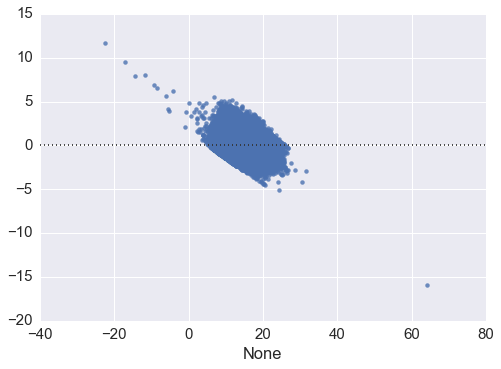

In [156]:
sns.residplot(model3.fittedvalues,model3.resid_pearson)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


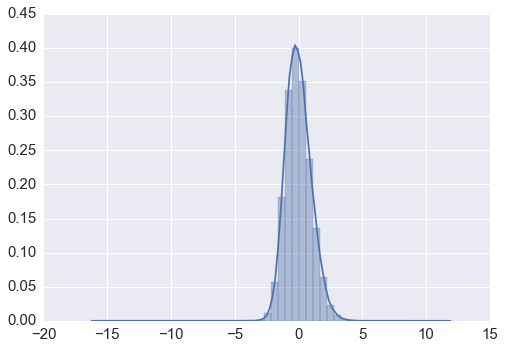

In [157]:
sns.distplot(model3.resid_pearson)

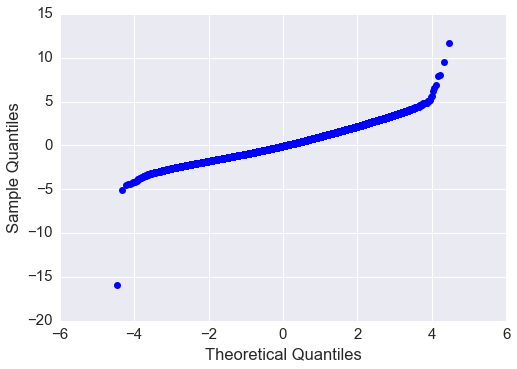

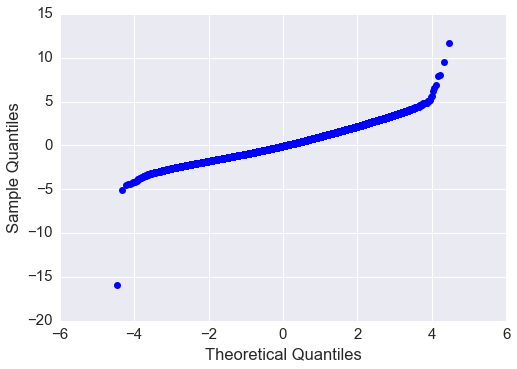

In [158]:
sm.graphics.gofplots.qqplot(model3.resid_pearson)

In [159]:
X3.corr()>.5

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,...,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,constant
loan_amnt,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
annual_inc,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dti,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
delinq_2yrs,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
inq_last_6mths,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
mths_since_last_delinq,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
mths_since_last_record,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
open_acc,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
pub_rec,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
revol_bal,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [160]:
sm.stats.diagnostic.het_breushpagan(model3.resid,model3.model.exog)

(10319.883393041993, 0.0, 250.10998337198171, 0.0)

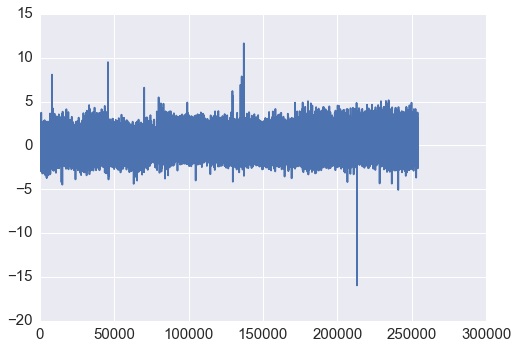

In [161]:
plt.plot(model3.resid_pearson)

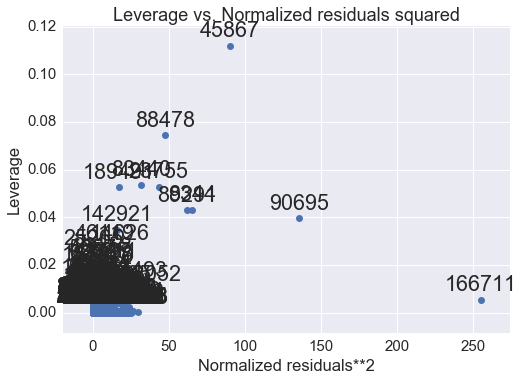

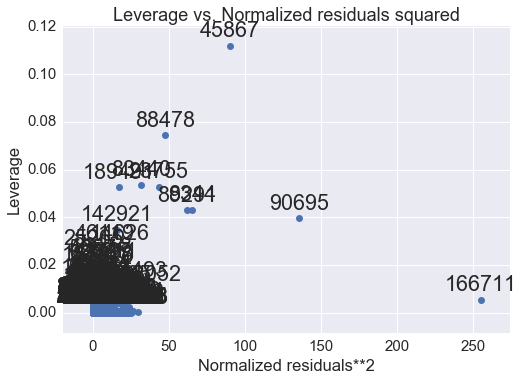

In [162]:
plot_leverage_resid2(model3)




> This useful for predicting interest rate. With an R^2 of 46%, we can explain 46% of the variation of the data through this model. In addition, the p-value for the F-statistic is below .05. This means we reject the null hypothesis that the coefficients for the independent variables in our model are equal to 0. 

-squared:	0.461
Model:	OLS	Adj. R-squared:	0.461
Method:	Least Squares	F-statistic:	5050.
Date:	Wed, 19 Oct 2016	Prob (F-statistic):	0.00

> With some modifications, step-wise regression to remove variables with p-values above .05, there is a slight improvement in the distribution of the error terms. Let us also try removing some of the outliers and see if our model improves. For outliers, we only want to remove points with high leverage and high residuals. 
- Let us re-run the model with the high leverage and high residual points removed. 
- In addition, take out features that are not available at the onset of a loan.

>Also, we still violate the terms of normality (Jarque-Bera p-value below .05). We will examine this more with these outliers removed below.



In [163]:

X4 = loan_removetime_total_df[['loan_amnt', 
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
        'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
         'term_ 36 months', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'home_ownership_MORTGAGE',
   'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business',
       'purpose_vacation']]
y4 = loan_removetime_total_df['int_rate']
X4['constant'] = 1

X4 = X4.drop(X4.index[[88478,45867,90695,142921,189421,88244]])
y4 = y4.drop(y4.index[[88478,45867,90695,142921,189421,88244]])



model4= smf.OLS(y4,X4).fit()
model4.summary()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     5224.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:14:41   Log-Likelihood:            -6.6123e+05
No. Observations:              254180   AIC:                         1.323e+06
Df Residuals:                  254139   BIC:                         1.323e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
loan_amnt                    6.033e-05   9.94e-07     60.682      0.000      5.84e-05  6.23e-05
annual_inc                  -4.088e-06   1.34e-07    -30.460      0.000     -4.35e-06 -3.83e-06
dti                             0.0406      0.001     42.509      0.000         0.039     0.042
delinq_2yrs                     0.5994      0.009     66.983      0.000         0.582     0.617
inq_last_6mths                  0.9379      0.006    151.612      0.000         0.926     0.950
mths_since_last_delinq          0.0117      0.000     35.584      0.000         0.011     0.012
mths_since_last_record          0.0053      0.000     13.928      0.000         0.005     0.006
open_acc                        0.1083      0.002     57.549      0.000         0.105     0.112
pub_rec                         0.7006      0.024     29.692      0.000         0.654     0.747
revol_bal                    -1.65e-05   4.02e-07    -41.035      0.000     -1.73e-05 -1.57e-05
revol_util                      0.0637      0.000    220.186      0.000         0.063     0.064
total_acc                      -0.0550      0.001    -69.352      0.000        -0.057    -0.053
collections_12_mths_ex_med      1.1593      0.073     15.952      0.000         1.017     1.302
mths_since_last_major_derog     0.0150      0.000     38.708      0.000         0.014     0.016
policy_code                     6.5291      0.041    159.013      0.000         6.449     6.610
acc_now_delinq                  2.0277      0.108     18.846      0.000         1.817     2.239
term_ 36 months                -4.1742      0.017   -243.291      0.000        -4.208    -4.141
emp_length_1 year              -0.5040      0.041    -12.152      0.000        -0.585    -0.423
emp_length_10+ years           -0.4680      0.035    -13.333      0.000        -0.537    -0.399
emp_length_2 years             -0.4748      0.039    -12.095      0.000        -0.552    -0.398
emp_length_3 years             -0.4976      0.040    -12.406      0.000        -0.576    -0.419
emp_length_4 years             -0.5122      0.042    -12.267      0.000        -0.594    -0.430
emp_length_5 years             -0.4684      0.041    -11.443      0.000        -0.549    -0.388
emp_length_6 years             -0.4667      0.042    -10.983      0.000        -0.550    -0.383
emp_length_7 years             -0.3644      0.043     -8.496      0.000        -0.448    -0.280
emp_length_8 years             -0.4149      0.045     -9.322      0.000        -0.502    -0.328
emp_length_9 years             -0.4049      0.047     -8.639      0.000        -0.497    -0.313
emp_length_< 1 year            -0.5741      0.040    -14.348      0.000        -0.653    -0.496
home_ownership_MORTGAGE        -0.9471      0.014    -67.968      0.000        -0.974    -0.920
purpose_car

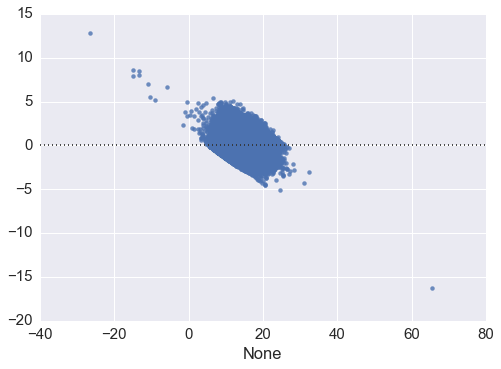

In [164]:
sns.residplot(model4.fittedvalues,model4.resid_pearson)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


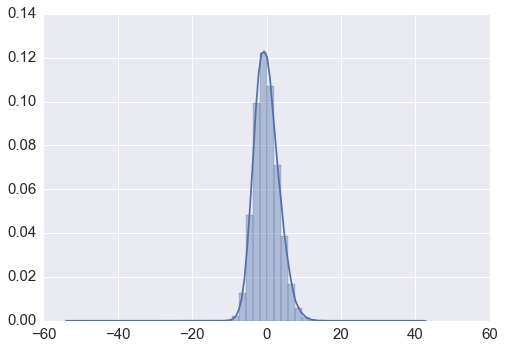

In [165]:
sns.distplot(model4.resid)

In [166]:
sm.stats.diagnostic.het_breushpagan(model4.resid,model4.model.exog)

(10642.9483395065, 0.0, 277.65674972370249, 0.0)

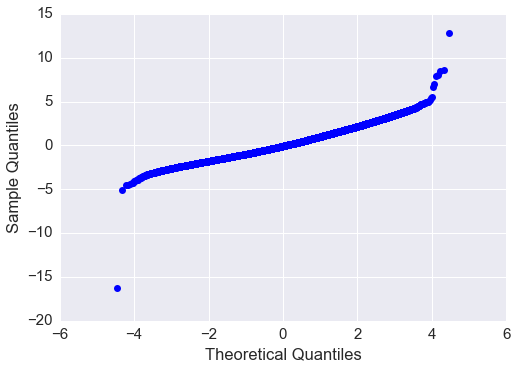

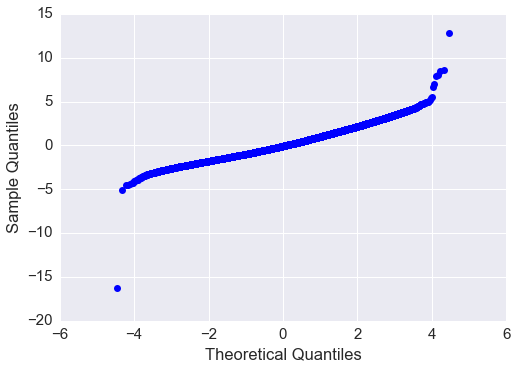

In [167]:
sm.graphics.gofplots.qqplot(model4.resid_pearson)

> For this last model, we still violate two assumptions of linear regression (Heteroskedascity and Normality of error terms). However, this model is still better than what we started with.

>The R^2 of .451 means that we can explain 45% of the variation of interest rate using this model. In addition, the p-value of our F-statistic is below .05 so we reject the null that the coefficients of our independent variables are equal to zero.

>In order to go further, we would have to remove all of the outliers in this model and transform our independent/dependent variables to satisfy normality. Therefore, we will leave model4 as our completed model.
- The p-value of our F-statistic is below .05. This means we can reject the null hypothesis that all coefficints are equal to 0, but we can't say how many are not equal to 0 until we look at the individual p-values.
- Key takeaways here are that we are predict with 46% accuracy what a person's interest rate will be given the following factors.
    - ['loan_amnt', 
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
        'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
         'term_ 36 months', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'home_ownership_MORTGAGE',
   'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business',
       'purpose_vacation']]
- The positive coefficients indicate to us which variables have a positive relationship with interest rate (will increase interest rate) while the negative coefficients indicate factors that have a negative realtionship with interest rate. 
- Some things that were expected in the model.
    - As income increases, interest rate decreases.
    - As you delinquencies in the past two years increase, your interest rate increases.
- Some unexpected things in our model.
    - The only home ownership factor that is significant for predicting interest rate is if you have a mortgage (more likely to pay off this loan).
    - For purpose, moving has the largest increase in interest rate while credit card has the biggest decrease in your interest rate. 
    - For number of years worked, <1 year has the largest relative decrease in intereset rates. Seven years worked has the smallest relative decrease in interest rates.

> ### Let's predict what my interest rate would be with the following (fictional) parameters.
- loan_amnt	= 50,000
- annual_inc = 100,000
- dti	= 15
- delinq_2yrs	= 0
- inq_last_6mths	= 1
- mths_since_last_delinq	= 100
- mths_since_last_record	= 100
- open_acc = 3
- pub_rec	= 0
- revol_bal	= 0  (Amount of credit cards that are not paid off at the end of each month)
- revol_util = 30 (Percent of credit currently using)
- total_acc	= 5 (total number of credit lines)
- collections_12_mths_ex_med	=0
- mths_since_last_major_derog	= 100
- policy_code	=1 (FICO score above 660 =1 otherwise =2)
- acc_now_delinq	= 0
- term_ 36 months	= 1
- emp_length_1 year	= 0
- emp_length_10+ years	= 0
- emp_length_2 years	= 1
- emp_length_3 years	= 0
- emp_length_4 years	=0
- emp_length_5 years	= 0
- emp_length_6 years	= 0
- emp_length_7 years	= 0
- emp_length_8 years	= 0
- emp_length_9 years	= 0
- emp_length_< 1 year	= 0
- home_ownership_MORTGAGE	= 0
- purpose_car	= 0
- purpose_credit_card	= 0
- purpose_debt_consolidation	= 0
- purpose_educational	= 1
- purpose_home_improvement	= 0
- purpose_house	= 0
- purpose_major_purchase	= 0
- purpose_medical	= 0
- purpose_moving	= 0
- purpose_other	= 0
- purpose_small_business	= 0
- purpose_vacation	= 0
- constant	= 1


In [168]:
model4.predict([40000,100000,15,0,1,100,100,3,0,0,30,5,0,100,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1])

array([ 16.22741939])

# Logistic Regression

>Next, we can look at a model that predict the probability of a person paying off or defaulting/charging off of their loan uinsg a logistic regression. We will look at factors that are available to all investors (no payment information on the loan). In addition, we will drop all varaibles related to time.
>Drop the following columns.
    - zip_code
    - addr_state
    - issue_d
    - desc
    - url
    - total_pymnt                  
    - total_pymnt_inv               
    - total_rec_prncp               
    - total_rec_int                 
    - total_rec_late_fee 
    - out_prncp                     
    - out_prncp_inv
    - percent_paid_of_loan
    - 'last_pymnt_d'
    - 'last_credit_pull_d'
    -' title
    - loan_status
    - emp_title
    - sub_grade
    - 'last_pymnt_amnt'
    - recoveries
    - collection_recovery_fee
    - purpose
    - 'initial_list_status
  

In [170]:
logistic_loan_removecol_total_df = loan_removecol_total_df.drop(['zip_code','addr_state','issue_d',\
                                                                'desc','url','total_pymnt','total_pymnt_inv',\
                                                                'total_rec_prncp','total_rec_int','total_rec_late_fee',\
                                                                'out_prncp','out_prncp_inv','last_pymnt_d',\
                                                                 'last_credit_pull_d','last_credit_pull_d',\
                                                                 'title','loan_status','emp_title','sub_grade',\
                                                                 'earliest_cr_line','last_pymnt_amnt',\
                                                                'next_pymnt_d','recoveries','collection_recovery_fee',\
                                                                'purpose','initial_list_status'\
                                                                ],axis=1)

In [171]:
logistic_loan_removecol_total_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'paid_off', 'percent_paid_of_loan', 'year'],
      dtype='object')

In [172]:
logistic_loan_removecol_total_df = pd.get_dummies(logistic_loan_removecol_total_df)

In [173]:
logistic_loan_removecol_total_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'paid_off', 'percent_paid_of_loan', 'year',
       'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'emp_length_n/a', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownershi

> Next, we can remove one column from our dummy variables due to linear dependence.

In [174]:
logistic_loan_removecol_total_df  = logistic_loan_removecol_total_df.drop(['term_ 36 months','grade_E','emp_length_n/a',\
                                                                          'home_ownership_NONE','verification_status_Not Verified',\
                                                                          'application_type_JOINT','verification_status_joint_0',])

In [175]:
logistic_loan_removecol_total_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'paid_off', 'percent_paid_of_loan', 'year',
       'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'emp_length_n/a', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownershi

- Now, we can use a logistic model.

In [177]:
X5 = logistic_loan_removecol_total_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim',  'term_ 36 months', 'term_ 60 months',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'emp_length_1 year', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'emp_length_n/a', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'pymnt_plan_n', 'pymnt_plan_y', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'verification_status_joint_0',
       'verification_status_joint_Source Verified']]

y5 = logistic_loan_removecol_total_df['paid_off']

X5['constant'] = 1

#y5 = np.array(y5)
#X5 = np.array(X5)

model5_glm = smf.GLM(y5,X5, family = smf.families.Binomial()).fit()
model5_glm.summary()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               paid_off   No. Observations:               254190
Model:                            GLM   Df Residuals:                   254140
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Oct 2016   Deviance:                   2.2247e+05
Time:                        11:19:39   Pearson chi2:                 4.50e+15
No. Iterations:                    24                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
loan_amnt                                 -2.527e-05   9.15e-06     -2.761      0.006     -4.32e-05 -7.33e-06
funded_amnt                               -3.782e-05   1.18e-05     -3.192      0.001      -6.1e-05 -1.46e-05
funded_amnt_inv                            7.371e-05    5.6e-06     13.164      0.000      6.27e-05  8.47e-05
int_rate                                     -0.1261      0.004    -29.723      0.000        -0.134    -0.118
installment                                  -0.0007      0.000     -4.593      0.000        -0.001    -0.000
annual_inc                                 4.371e-06   2.07e-07     21.105      0.000      3.97e-06  4.78e-06
dti                                          -0.0228      0.001    -28.392      0.000        -0.024    -0.021
delinq_2yrs                                  -0.0556      0.007     -7.893      0.000        -0.069    -0.042
inq_last_6mths                               -0.0756      0.005    -14.688      0.000        -0.086    -0.065
mths_since_last_delinq                        0.0012      0.000      4.284      0.000         0.001     0.002
mths_since_last_record                      2.88e-05      0.000      0.093      0.926        -0.001     0.001
open_acc                                     -0.0186      0.002    -11.771      0.000        -0.022    -0.016
pub_rec                                       0.0203      0.020      1.030      0.303        -0.018     0.059
revol_bal                                  2.768e-07   5.74e-07      0.482      0.630     -8.48e-07   1.4e-06
revol_util                                   -0.0032      0.000    -11.295      0.000        -0.004    -0.003
total_acc                                     0.0128      0.001     18.467      0.000         0.011     0.014
collections_12_mths_ex_med                   -0.1150      0.056     -2.053      0.040        -0.225    -0.005
mths_since_last_major_derog               -4.422e-05      0.000     -0.137      0.891        -0.001     0.001
policy_code                                   8.7682   9990.434      0.001      0.999     -1.96e+04  1.96e+04
acc_now_delinq                               -0.0519      0.082     -0.636      0.525        -0.212     0.108
tot_coll_amt                               2.644e-06   4.25e-06      0.622      0.534     -5.69e-06   1.1e-05
tot_cur_bal                                6.166e-07   6.06e-08     10.176      0.000      4.98e-07  7.35e-07
total_rev_hi_lim                           6.893e-07   3.79e-07      1.818      0.069     -5.39e-08  1.43e-06
term_ 36 months                               4.6515   4995.216      0.001      0.999     -9785.792  9795.095
term_ 60 months                               4.1167   4995.216      0.001      0.999     -9786.327  9794.561
grade_A                                       1.0690   1427.205      0.001      0.

> Next, remove the columns where the coefficients are below .05 (We will, however, keep the constant term).

In [178]:
X6 = logistic_loan_removecol_total_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc',
        'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 
       'policy_code', 'tot_cur_bal',
        ]]
#X6 = X6+.0000001

y6 = logistic_loan_removecol_total_df['paid_off']

X6['constant'] = 1

#y5 = np.array(y5)
#X5 = np.array(X5)

model6_glm = smf.GLM(y6,X6, family = smf.families.Binomial()).fit()
model6_glm.summary()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               paid_off   No. Observations:               254190
Model:                            GLM   Df Residuals:                   254173
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Oct 2016   Deviance:                   2.2347e+05
Time:                        11:19:51   Pearson chi2:                 4.50e+15
No. Iterations:                     9                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
loan_amnt                  -2.587e-05   9.05e-06     -2.859      0.004     -4.36e-05 -8.13e-06
funded_amnt                   -0.0001   1.12e-05     -9.113      0.000        -0.000 -7.98e-05
funded_amnt_inv             6.452e-05    5.5e-06     11.734      0.000      5.37e-05  7.53e-05
int_rate                      -0.1196      0.001    -85.148      0.000        -0.122    -0.117
installment                    0.0016   7.35e-05     21.296      0.000         0.001     0.002
annual_inc                  4.848e-06   2.07e-07     23.463      0.000      4.44e-06  5.25e-06
dti                           -0.0234      0.001    -29.313      0.000        -0.025    -0.022
delinq_2yrs                   -0.0563      0.007     -8.074      0.000        -0.070    -0.043
inq_last_6mths                -0.0740      0.005    -14.438      0.000        -0.084    -0.064
mths_since_last_delinq         0.0010      0.000      4.271      0.000         0.001     0.002
open_acc                      -0.0181      0.002    -11.623      0.000        -0.021    -0.015
revol_bal                    1.04e-06   4.39e-07      2.368      0.018      1.79e-07   1.9e-06
revol_util                    -0.0037      0.000    -14.410      0.000        -0.004    -0.003
total_acc                      0.0129      0.001     19.048      0.000         0.012     0.014
collections_12_mths_ex_med    -0.1291      0.056     -2.311      0.021        -0.239    -0.020
policy_code                    1.7958      0.014    130.065      0.000         1.769     1.823
tot_cur_bal                 8.619e-07   5.17e-08     16.673      0.000      7.61e-07  9.63e-07
constant                       1.7958      0.014    130.065      0.000         1.769     1.823
==============================================================================================
"""

In [179]:
X6.corr()>.5


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,tot_cur_bal,constant
loan_amnt,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
funded_amnt,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
funded_amnt_inv,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
int_rate,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
installment,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
annual_inc,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
dti,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
delinq_2yrs,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
inq_last_6mths,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
mths_since_last_delinq,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


>Remove varaibles with correlation >.5 and re-run.
    - Funded_amnt
    - funded_amnt_inv
    - installment
    

In [180]:
X7 = logistic_loan_removecol_total_df[['loan_amnt',  'int_rate',
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc',
         'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 
       'policy_code', 'tot_cur_bal',
        ]]
#X7 = X7+.1

y7 = logistic_loan_removecol_total_df['paid_off']

X7['constant'] = 1

#y7= y7+.011

#y5 = np.array(y5)
#X5 = np.array(X5)

model7_glm = smf.GLM(y7,X7, family = smf.families.Binomial()).fit()
model7_glm.summary2()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
===========================================================================
Model:                 GLM                 AIC:               nan          
Link Function:         logit               BIC:               -2939391.1921
Dependent Variable:    paid_off            Log-Likelihood:    nan          
Date:                  2016-10-19 11:20    LL-Null:           -1.2090e+05  
No. Observations:      254190              Deviance:          2.2405e+05   
Df Model:              12                  Pearson chi2:      4.50e+15     
Df Residuals:          254177              Scale:             1.0000       
Method:                IRLS                                                
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
loan_amnt                  -0.0000   0.0000 -23.9992 0.0000 -0.0000 -0.0000
int_rate                   -0.1213   0.0014 -87.4671 0.0000 -0.1240 -0.1185
annual_inc                  0.0000   0.0000  25.4654 0.0000  0.0000  0.0000
dti                        -0.0227   0.0008 -28.8636 0.0000 -0.0243 -0.0212
delinq_2yrs                -0.0485   0.0069  -6.9843 0.0000 -0.0622 -0.0349
inq_last_6mths             -0.0659   0.0051 -12.9302 0.0000 -0.0759 -0.0559
mths_since_last_delinq      0.0013   0.0002   5.2342 0.0000  0.0008  0.0017
open_acc                   -0.0152   0.0015  -9.8889 0.0000 -0.0182 -0.0122
revol_util                 -0.0029   0.0002 -11.5484 0.0000 -0.0033 -0.0024
total_acc                   0.0119   0.0007  17.5680 0.0000  0.0105  0.0132
collections_12_mths_ex_med -0.1162   0.0558  -2.0810 0.0374 -0.2256 -0.0068
policy_code                 1.7913   0.0136 131.9844 0.0000  1.7647  1.8179
tot_cur_bal                 0.0000   0.0000  16.4018 0.0000  0.0000  0.0000
constant                    1.7913   0.0136 131.9844 0.0000  1.7647  1.8179
===========================================================================

"""

### Results of GLM using Logistic link function.
> Above is the final model for predicting the percent change that a person will pay off their loans. Interpreting the logistic function coefficients is difficult except for the magnitude of the coefficient. Also, notice that the log-likellihood here is nan. This is because we are taking the log of some values that are zero. THE BIC (Bayesian information criterion) is -2,939,391 compared to -2,939,922.8775 for the previous model. This suggests a worse model, but it is better in our case because we addresed multicolinearity. 

>Some suprising findings in our model.
- Grade is not significant for predicting paid off chance.
- employement length is not significant for predicting paid off chance. 


>The following factors increase your chance of repaying the loan.
- total_cur_bal (Total current balance of all accounts)
- policy_code (publicaly available =1, not publically available =2, The FICO scores on these borrowers are typically 640-659, below the 660 threshold on Policy Code 1 loans (for code = 2.)
- total_acc (The total number of credit lines IN borrower's account)
- mths_since_last_delinq
- annual_inc


>The following factors decrease a person's chance of repaying a loan.
- collections_12_mths_ex_med (number of collections in the past 12 months- excluding medical)
- revol_util (amount of credit borrower is using against all available credit)
- open_acc (The number of open credit lines in the borrower's credit file)
- inq_last_6mths (Number of credit inquires in past 6 months)
- delinq_2yrs (number of 30+ past day incidence of deliquency in borrower's credit for past 2 years)
- dti ( a ratio calculated using the borrower's total monthly debt payments on the total debt obligations, divided by the borrower's self reported monthly income).
- int_rate	
- loan_amnt



> In order to interpret the chance of somebody repaying a loan, we need to plug in variables for our coefficients, and then take the resulting number and put it into the following. 

$$ f(t) = \frac{e^t}{1 + e^t} = \frac{exp(t)}{1 + exp(t)} = \frac{1}{1 + e^{-t}} $$

In [181]:
model7_glm.predict([10000,13,40000,14,0,0,0,4,30,5,0,1,0,1])

array([ 0.83445292])

> With the parameters above, this person has a 83%  chance of repaying their loan.

In [182]:
def probability():
    
    
    loan_amnt = float(input("What is the size of loan you want to take out?"))
    int_rate = float(input("What interest rate is your loan at? (Write as 13.8, not .138) "))
    annual_inc = float(input("What is your annual_inc? (current or future)"))
    monthly_inc = annual_inc/12.0
    debt_payments = float(input("How much are your monthly debt payments? (credit/ debt, do not include mortgage)"))
    dti = debt_payments/monthly_inc
    delinq_2yrs = float(input("How many 30+ days notices of deliquencies have you had in the past two years?"))
    inq_last_6mths = float(input("How many credit inquires have you had in the last six months (not including auto and mortgage)?"))
    mths_since_last_delinq = float(input('How many months since your last credit delinquency? '))
    open_acc = float(input(' How many open credit lines do you have?'))
    revol_util = float(input(" What percent of your total credit available are you using? (Write as 30.1, not .301)"))
    total_acc = float(input("How many credit lines do you have in your credit history?"))
    collections_12_mths = float(input("How many collections (for credit) have you completed in the past 12 months?"))
    
    while True:
        try:
            policy_code = float(input("Is you FICO score above 660 (1-yes 2-no)"))
            if policy_code ==1 or policy_code ==2:
                break
            else:
                print("You need a 1 or 2 for FICO score!")
        except:
            print('You passed a string instead of a number!')
           
    
    
    tot_cur_bal =float(input ("What is the current balance of all your accounts (savings, investments ..etc)?"))
    constant=1
    
    print("You have a ",model7_glm.predict([loan_amnt,int_rate,annual_inc,dti, delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,\
                       revol_util,total_acc, collections_12_mths,policy_code,tot_cur_bal,constant ]), "chance of repaying your loan. ")

In [183]:
probability()

What is the size of loan you want to take out?50000
What interest rate is your loan at? (Write as 13.8, not .138) 8
What is your annual_inc? (current or future)90000
How much are your monthly debt payments? (credit/ debt, do not include mortgage)3000
How many 30+ days notices of deliquencies have you had in the past two years?0
How many credit inquires have you had in the last six months (not including auto and mortgage)?1
How many months since your last credit delinquency? 100
 How many open credit lines do you have?3
 What percent of your total credit available are you using? (Write as 30.1, not .301)35
How many credit lines do you have in your credit history?5
How many collections (for credit) have you completed in the past 12 months?0
Is you FICO score above 660 (1-yes 2-no)1
What is the current balance of all your accounts (savings, investments ..etc)?10000
You have a  [ 0.89143759] chance of repaying your loan. 


# Time Series

> Here, we will examine the number of defaults/charged off loans relative to paid off loans for each month from 2008-2015.

In [184]:
loan_removecol_total_df.loan_status.unique()

array(['Default', 'Charged Off', 'Fully Paid'], dtype=object)

In [185]:
#Convert out date information into date_time format and create a year columns
loan_removecol_total_df.issue_d = pd.to_datetime(loan_removecol_total_df.issue_d )
loan_removecol_total_df['year'] = pd.DatetimeIndex(loan_removecol_total_df['issue_d']).year


### Remove loans that were issues after 2013. This allows three years for people to have paid off their loans (but will still be low since there are 36 and 60 month terms).

In [186]:
loans_before2014_total_df = loan_removecol_total_df[loan_removecol_total_df.year<2014]

In [187]:
loans_before2014_total_df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,paid_off,percent_paid_of_loan,year
130021,8650.0,8650.0,8625.0,36 months,14.65,298.38,C,C3,Harrahs Hotel and Casino,9 years,...,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0,1,1.223479,2012
130022,12000.0,12000.0,11975.0,36 months,7.90,375.49,A,A4,mpmi,3 years,...,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0,1,1.085172,2012
130023,20500.0,20500.0,20500.0,36 months,16.77,728.54,D,D2,0,7 years,...,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0,1,1.276746,2012
130024,15000.0,15000.0,15000.0,36 months,15.27,521.97,C,C4,0,3 years,...,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0,1,1.252257,2012
130025,35000.0,35000.0,35000.0,36 months,15.96,1229.81,C,C5,Tom and Holly Gores,3 years,...,1.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0,1,1.264787,2012


In [188]:
#Total number of paid off loan
loans_before2014_total_df.paid_off.sum()

130026

In [189]:
#Total number of loans
loans_before2014_total_df.grade.count()

158739

In [190]:
#Take the total count of paid off loans and divide by loans that have defaulted/charged off. Next, model this data.

loan_time_total_paid_count_df = loans_before2014_total_df.groupby(['issue_d']).paid_off.count().reset_index()
loan_time_total_all_grouped = loans_before2014_total_df.groupby(['issue_d']).paid_off.sum().reset_index()

#loan_time_total_df.paid_off

In [191]:
percent_loan = loan_time_total_all_grouped.paid_off/loan_time_total_paid_count_df.paid_off
loan_time_total_df = loan_time_total_paid_count_df.rename(columns = {'paid_off':'percent_of_loan_paid_off'})

In [192]:
loan_time_total_df['percent_of_loan_paid_off']=percent_loan
#loan_time_total_df = loan_time_total_df.drop('paid_off',axis=1)
loan_time_total_df.set_index(['issue_d'],inplace=True)


In [193]:
loan_time_total_paid_count_df.tail()

,issue_d,paid_off
74,2013-08-01,6425
75,2013-09-01,6369
76,2013-10-01,6653
77,2013-11-01,6665
78,2013-12-01,6644


In [194]:
loan_time_total_all_grouped.tail()

,issue_d,paid_off
74,2013-08-01,5030
75,2013-09-01,5007
76,2013-10-01,5264
77,2013-11-01,5287
78,2013-12-01,5345


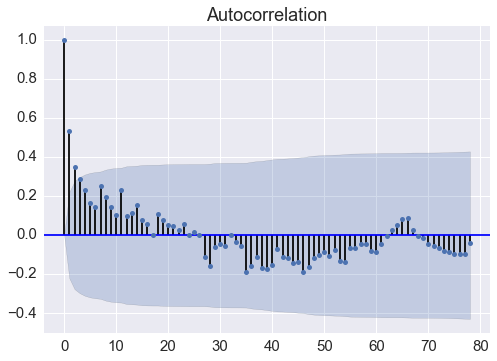

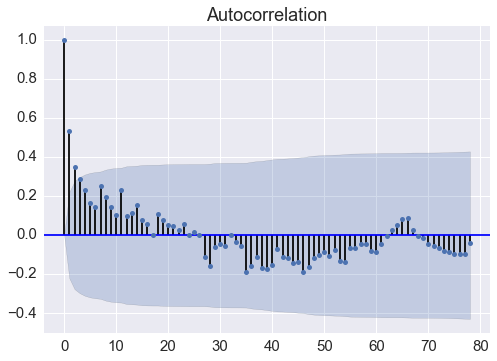

In [195]:
smf.graphics.tsa.plot_acf(loan_time_total_df.percent_of_loan_paid_off)

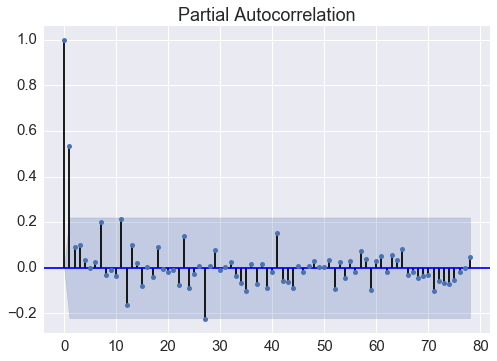

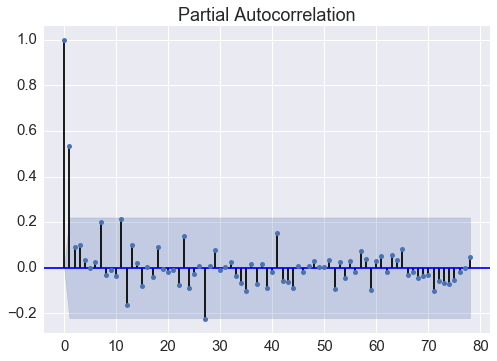

In [196]:
smf.graphics.tsa.plot_pacf(loan_time_total_df.percent_of_loan_paid_off)

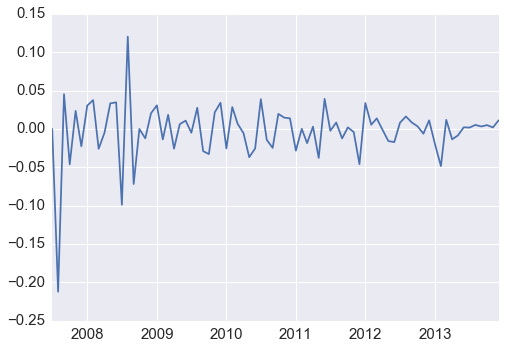

In [197]:
plt.plot(loan_time_total_df.percent_of_loan_paid_off.diff(1))

- The first difference almost creates a stationary model, but not quite. 

> From the above, it seems like we can build a model with the following parameters. AR (p) = 1 since there are two significant lag parameters from the PACF graph. MA (q) = 2 since there  are two significant lag parameters from the ACF graph. Next, let us build a model for this data. We will use an ARMA model here since we can not take enough differences to make our data stationary.

In [198]:
loan_time_total_df.head()

,percent_of_loan_paid_off
issue_d,
2007-06-01,1.000000
2007-07-01,1.000000
2007-08-01,0.787879
2007-09-01,0.833333
2007-10-01,0.787234


In [199]:
#ARMA model

percent_default_arma_model = sm.tsa.arima_model.ARMA(loan_time_total_df,(1,2)).fit()

In [200]:
percent_default_arma_model.params

const                             0.850027
ar.L1.percent_of_loan_paid_off    0.766545
ma.L1.percent_of_loan_paid_off   -0.230024
ma.L2.percent_of_loan_paid_off    0.172049
dtype: float64

In [201]:
percent_default_arma_model .summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: ARMA
=============================================================================
Model:               ARMA                     BIC:                 -287.5278 
Dependent Variable:  percent_of_loan_paid_off Log-Likelihood:      154.69    
Date:                2016-10-19 11:21         Scale:               1.0000    
No. Observations:    79                       Method:              css-mle   
Df Model:            4                        Sample:              06-01-2007
Df Residuals:        75                                            12-01-2013
Converged:           1.0000                   S.D. of innovations: 0.034     
AIC:                 -299.3750                HQIC:                -294.629  
-----------------------------------------------------------------------------
                                Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------------------
const                           0.8500   0.0152 55.9692 0.0000  0.8203 0.8798
ar.L1.percent_of_loan_paid_off  0.7665   0.1378  5.5644 0.0000  0.4965 1.0365
ma.L1.percent_of_loan_paid_off -0.2300   0.1694 -1.3581 0.1785 -0.5620 0.1019
ma.L2.percent_of_loan_paid_off  0.1720   0.1594  1.0792 0.2840 -0.1404 0.4845
-----------------------------------------------------------------------------------------
                    Real              Imaginary             Modulus             Frequency
-----------------------------------------------------------------------------------------
AR.1               1.3046                0.0000              1.3046                0.0000
MA.1               0.6685               -2.3163              2.4109               -0.2053
MA.2               0.6685                2.3163              2.4109                0.2053
=============================================================================

"""

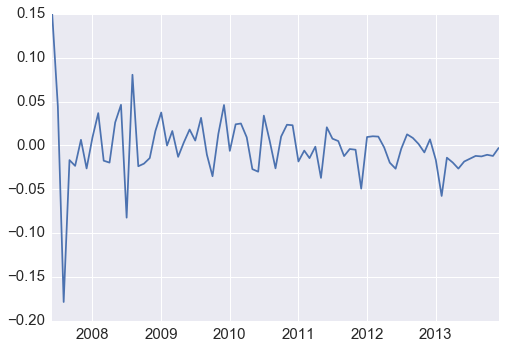

In [202]:
plt.plot(percent_default_arma_model.resid)

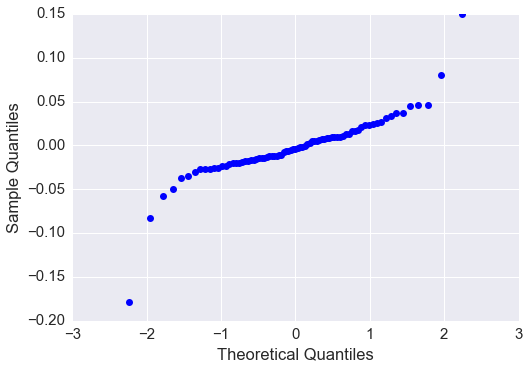

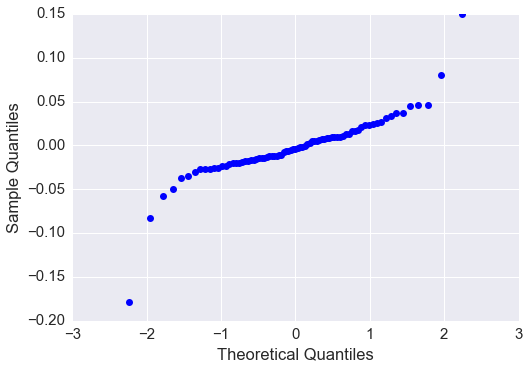

In [203]:
qqplot(percent_default_arma_model.resid)

> Above, we can see some outliers that are violating the normality of our error terms. For future work, these points should be exaimined to determine if they should be removed.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


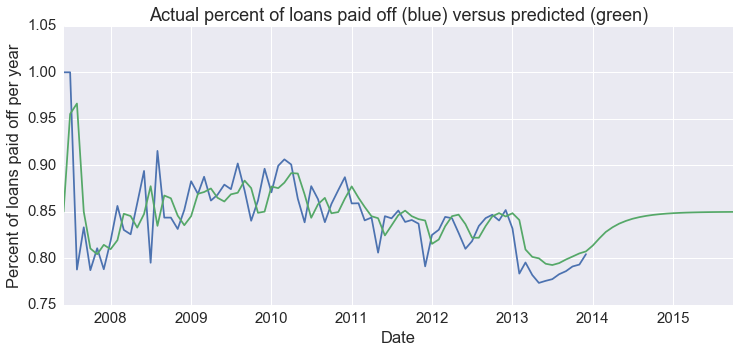

In [204]:
plt.figure(figsize=(12,5))
plt.plot(loan_time_total_df)

plt.plot(percent_default_arma_model.predict('2007-06-01','2015-10-01'))
#plt.plot(percent_default_arma_model.predict('2014-06-01','2017-10-01',dynamic=True))
plt.title('Actual percent of loans paid off (blue) versus predicted (green)')
plt.ylabel('Percent of loans paid off per year')
plt.xlabel('Date')

> One thing about predicting out of sample with ARMA, is that it quickly converges to the long-term mean value (green line above). If we added seasonality terms, we would have a better long term perdiction.